# Troubled markets
### _An exploration on Argentina's ADRs recent performance_

[American Depositary Reciepts](https://www.investopedia.com/terms/a/adr.asp) (ADRs) are financial instruments that allow US investors to purchase stocks in foreign companies. Argentina has a number of companies listed in US exchanges through ADRs.  
In this notebook, we will explore the performance of these ADRs with a focus on the recent months, where political uncertainty sent markets into turmoil: the country’s Merval stock index fell 48% in dollar terms in a single day, the second-largest one-day drop in any of the 94 markets tracked by Bloomberg since 1950<sup>[1](https://www.ft.com/content/29764546-c821-11e9-a1f4-3669401ba76f)</sup>, causing a 20% devaluation of the Argentine peso and a sharp drop in bond prices.  
We will be looking at the end-of-day data of the Argentine ADRs, and their corresponding put and call options.

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os

import numpy as np
import pandas as pd
import warnings
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter('ignore')
register_matplotlib_converters()

In [2]:
sns.set(rc={'figure.figsize': (12,8)})

## Data munging

In [3]:
data_dir = 'data/'

In [ ]:
tickers = [
    'BMA', 'BFR', 'CEPU', 'CRESY', 'EDN', 'GGAL', 'SUPV', 'IRS',
    'IRCP', 'LOMA', 'NTL', 'MELI', 'PAM', 'PZE', 'TEO', 'TS', 'TX',
    'TGS', 'YPF'
]

dfs = [pd.read_csv(os.path.join(data_dir, ticker.lower() + '.csv')) for ticker in tickers]

adrs_df = pd.concat(dfs, axis=0, ignore_index=False)
adrs_df.to_csv(os.path.join(data_dir, 'adrs.csv'), index=False)

Next we'll concatenate all options daily files into a csv.

In [ ]:
dfs = []

for root, dirs, files in os.walk(data_dir):
    if root.endswith('daily'):
        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            dfs.append(df)
            
adr_options = pd.concat(dfs, axis=0)
adr_options.to_csv(os.path.join(data_dir, 'adr_options.csv'), index=False)

## Exploration

We begin our exploration of the end-of-day (EOD) data for Argentina's ADRs.

In [4]:
adrs_df = pd.read_csv(os.path.join(data_dir, 'adrs.csv'), index_col='date', parse_dates=['date'])
adrs_df.head()

symbol  close   high    low   open   volume  \
date                                                                    
2006-03-27 00:00:00+00:00    BMA  23.05  23.05  22.23  22.89  1065200   
2006-03-28 00:00:00+00:00    BMA  22.38  22.47  21.90  22.47  1556100   
2006-03-29 00:00:00+00:00    BMA  22.84  23.14  22.05  22.10   641300   
2006-03-30 00:00:00+00:00    BMA  22.75  23.10  22.70  23.00   293600   
2006-03-31 00:00:00+00:00    BMA  22.93  22.93  22.35  22.83   113600   

                            adjClose    adjHigh     adjLow    adjOpen  \
date                                                                    
2006-03-27 00:00:00+00:00  15.524521  15.524521  14.972239  15.416759   
2006-03-28 00:00:00+00:00  15.073266  15.133883  14.749979  15.133883   
2006-03-29 00:00:00+00:00  15.383083  15.585138  14.851006  14.884682   
2006-03-30 00:00:00+00:00  15.322467  15.558197  15.288791  15.490846   
2006-03-31 00:00:00+00:00  15.443700  15.443700  15.053061  15.376348   

                           adjVolume  divCash  splitFactor  
date                                                        
2006-03-27 00:00:00+00:00    1065200      0.0          1.0  
2006-03-28 00:00:00+00:00    1556100      0.0          1.0  
2006-03-29 00:00:00+00:00     641300      0.0          1.0  
2006-03-30 00:00:00+00:00     293600      0.0          1.0  
2006-03-31 00:00:00+00:00     113600      0.0          1.0

The data is indexed by date, with the `symbol` column holding the ticker name, and columns for the `open` and `close` prices (the price of the symbol at the start/end of the market day) and the `high` and `low` prices seen for the symbol at that date.  
We'll begin plotting the [`adjusted close`](http://www.crsp.com/products/documentation/crsp-calculations) prices for each symbol (price adjusted for dividends payed and stock splits). The reset of the columns can be safely ingored for our purposes.

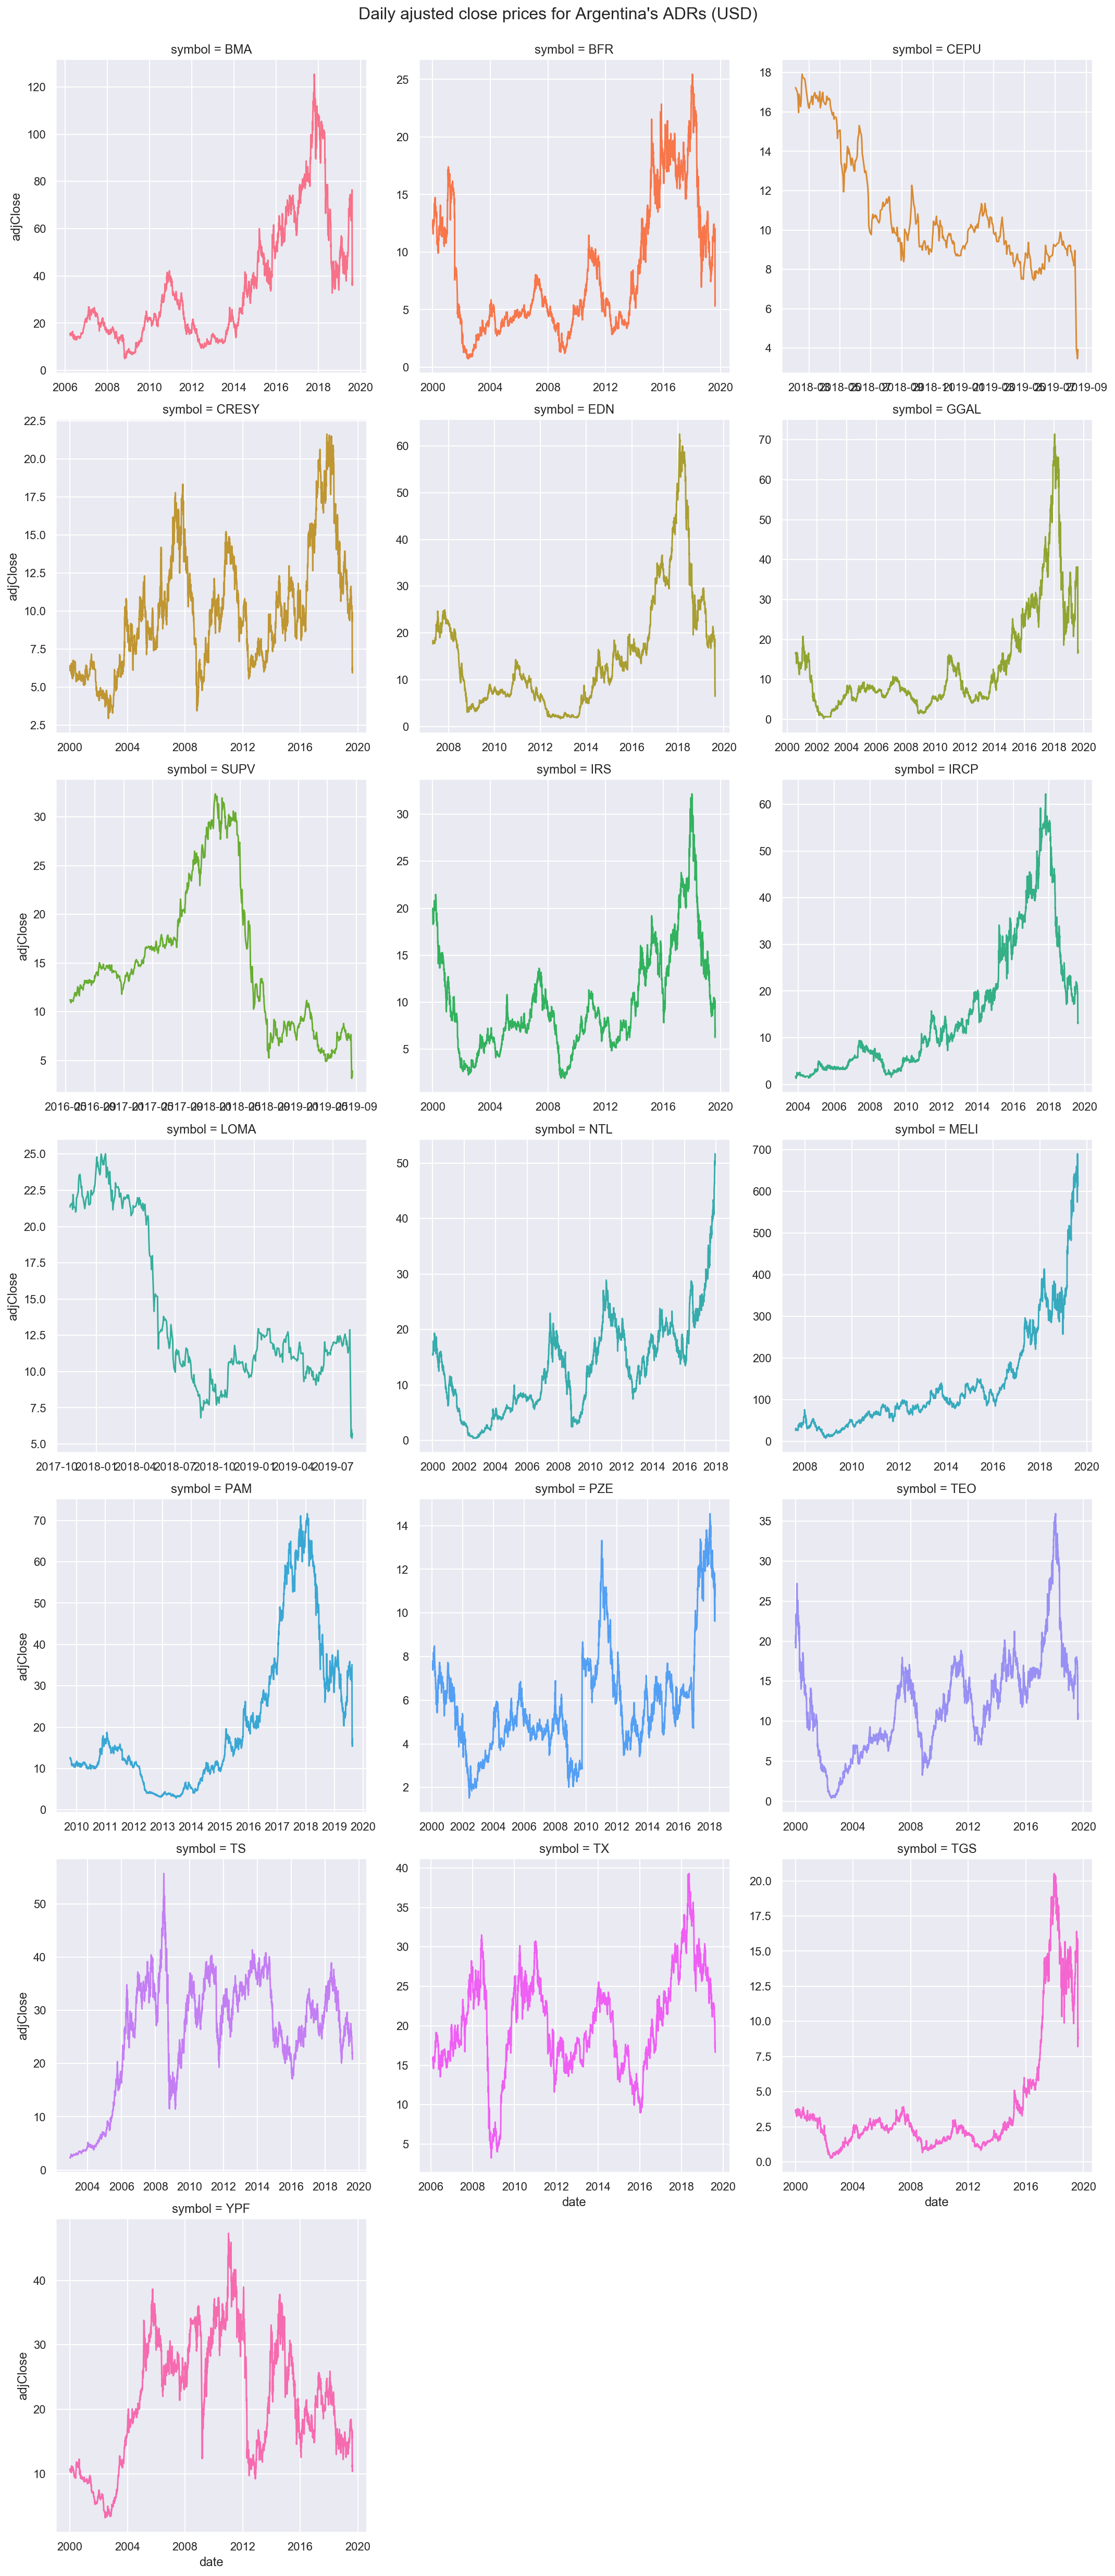

In [5]:
g = sns.relplot(x='date', y='adjClose', col='symbol', hue='symbol',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=False,
            kind='line', data=adrs_df.reset_index())

g.fig.suptitle("Daily ajusted close prices for Argentina's ADRs (USD)", size=16)
g.fig.subplots_adjust(top=.96);

In [6]:
adrs_df.groupby('symbol')['adjClose'].describe()

count        mean         std       min        25%        50%  \
symbol                                                                   
BFR     4936.0    8.279068    5.706390  0.744824   3.953318   5.724786   
BMA     3371.0   35.178278   25.470378  4.999717  15.792980  24.600919   
CEPU     386.0   10.988264    2.897472  3.460000   9.060000   9.975000   
CRESY   4936.0    9.937665    3.951959  2.923092   6.744933   9.466466   
EDN     3099.0   15.310731   12.471194  1.710000   6.330000  12.110000   
GGAL    4795.0   13.551952   13.195641  0.211733   5.404357   7.966350   
IRCP    3971.0   15.634198   14.424214  1.293231   4.377059  10.018225   
IRS     4936.0   10.068860    5.624760  1.904546   6.130128   8.541985   
LOMA     449.0   14.069621    5.356757  5.400000  10.340000  11.740000   
MELI    3025.0  138.089838  126.898120  8.023763  59.112264  93.592940   
NTL     4519.0   13.146904    8.402332  0.392764   6.546068  12.756651   
PAM     2479.0   21.467967   18.064011  2.850000   9.885292  14.590000   
PZE     4608.0    5.865744    2.463131  1.515041   4.362068   5.365770   
SUPV     816.0   15.182065    7.337212  3.160000   8.918750  13.907507   
TEO     4936.0   12.194805    6.370887  0.380288   7.642209  12.427119   
TGS     4936.0    4.000758    4.341288  0.287635   1.615702   2.457407   
TS      4195.0   25.943267   10.946160  2.261653  21.353160  28.215679   
TX      3408.0   20.250514    6.297409  3.256623  16.042294  19.848379   
YPF     4936.0   21.578362    9.696556  3.164889  14.031595  21.594239   

               75%         max  
symbol                          
BFR      12.029480   25.454491  
BMA      48.906183  125.424911  
CEPU     12.277500   17.919462  
CRESY    12.010526   21.638971  
EDN      20.245000   62.550000  
GGAL     16.436948   71.458310  
IRCP     21.425000   62.224671  
IRS      13.279294   32.170000  
LOMA     21.120000   25.020000  
MELI    153.612638  690.100000  
NTL      18.681158   51.700000  
PAM      30.800000   71.650000  
PZE       6.720500   14.550000  
SUPV     17.840770   32.369630  
TEO      16.013961   35.963224  
TGS       3.514175   20.523048  
TS       34.121053   55.724628  
TX       24.567725   39.303918  
YPF      29.665596   47.309175

### Daily returns

Next we'll calculate the daily returns.  

$$R_n = \frac{S_n - S_{n-1}}{S_{n-1}}$$

In [7]:
adrs_df['return'] = adrs_df.groupby('symbol')['adjClose'].pct_change() * 100

In [8]:
adrs_df.head()

symbol  close   high    low   open   volume  \
date                                                                    
2006-03-27 00:00:00+00:00    BMA  23.05  23.05  22.23  22.89  1065200   
2006-03-28 00:00:00+00:00    BMA  22.38  22.47  21.90  22.47  1556100   
2006-03-29 00:00:00+00:00    BMA  22.84  23.14  22.05  22.10   641300   
2006-03-30 00:00:00+00:00    BMA  22.75  23.10  22.70  23.00   293600   
2006-03-31 00:00:00+00:00    BMA  22.93  22.93  22.35  22.83   113600   

                            adjClose    adjHigh     adjLow    adjOpen  \
date                                                                    
2006-03-27 00:00:00+00:00  15.524521  15.524521  14.972239  15.416759   
2006-03-28 00:00:00+00:00  15.073266  15.133883  14.749979  15.133883   
2006-03-29 00:00:00+00:00  15.383083  15.585138  14.851006  14.884682   
2006-03-30 00:00:00+00:00  15.322467  15.558197  15.288791  15.490846   
2006-03-31 00:00:00+00:00  15.443700  15.443700  15.053061  15.376348   

                           adjVolume  divCash  splitFactor    return  
date                                                                  
2006-03-27 00:00:00+00:00    1065200      0.0          1.0       NaN  
2006-03-28 00:00:00+00:00    1556100      0.0          1.0 -2.906725  
2006-03-29 00:00:00+00:00     641300      0.0          1.0  2.055407  
2006-03-30 00:00:00+00:00     293600      0.0          1.0 -0.394046  
2006-03-31 00:00:00+00:00     113600      0.0          1.0  0.791209

In [9]:
adrs_df.groupby('symbol')['return'].describe()

count      mean       std        min       25%       50%       75%  \
symbol                                                                        
BFR     4935.0  0.053087  3.671496 -55.850622 -1.734230  0.000000  1.686544   
BMA     3370.0  0.083384  3.282690 -52.667364 -1.489327  0.000000  1.647746   
CEPU     385.0 -0.265245  4.306204 -55.915179 -1.913876 -0.317460  1.581028   
CRESY   4935.0  0.038327  2.767597 -38.090452 -1.250890  0.000000  1.180099   
EDN     3098.0  0.051126  3.888776 -58.983957 -1.690714 -0.031217  1.629187   
GGAL    4794.0  0.094611  4.627147 -56.117370 -1.626710  0.000000  1.693722   
IRCP    3970.0  0.142312  4.226301 -32.424983 -0.681957  0.000000  0.849814   
IRS     4935.0  0.015710  2.675223 -38.287402 -1.250000  0.000000  1.214575   
LOMA     448.0 -0.166143  4.533969 -57.298137 -1.875441 -0.087351  1.505056   
MELI    3024.0  0.165014  3.566247 -21.198668 -1.400264  0.083916  1.589953   
NTL     4518.0  0.082807  3.342394 -46.188341 -1.315789  0.000000  1.365299   
PAM     2478.0  0.060250  2.964323 -53.815490 -1.415248  0.000000  1.411089   
PZE     4607.0  0.066024  3.908461 -19.221411 -1.457769  0.000000  1.415805   
SUPV     815.0 -0.025345  4.183604 -58.746736 -1.407739  0.000000  1.494714   
TEO     4935.0  0.035329  3.079372 -33.375796 -1.419974  0.000000  1.450779   
TGS     4935.0  0.077615  3.385825 -48.035488 -1.494490  0.000000  1.615534   
TS      4194.0  0.084939  2.537497 -21.309735 -1.177830  0.113344  1.351878   
TX      3407.0  0.047116  3.028683 -19.678519 -1.351580  0.036819  1.413508   
YPF     4935.0  0.033014  2.563941 -34.052758 -1.121233  0.000000  1.123280   

               max  
symbol              
BFR      46.760563  
BMA      27.008149  
CEPU     16.880093  
CRESY    27.118644  
EDN      27.551020  
GGAL    153.623188  
IRCP     36.986301  
IRS      18.083573  
LOMA     22.650602  
MELI     36.000000  
NTL      30.000000  
PAM      16.941990  
PZE     179.843750  
SUPV     28.330206  
TEO      23.076923  
TGS      25.203252  
TS       21.576763  
TX       49.096099  
YPF      37.254597

Let's plot a histogram of the daily returns for each symbol.

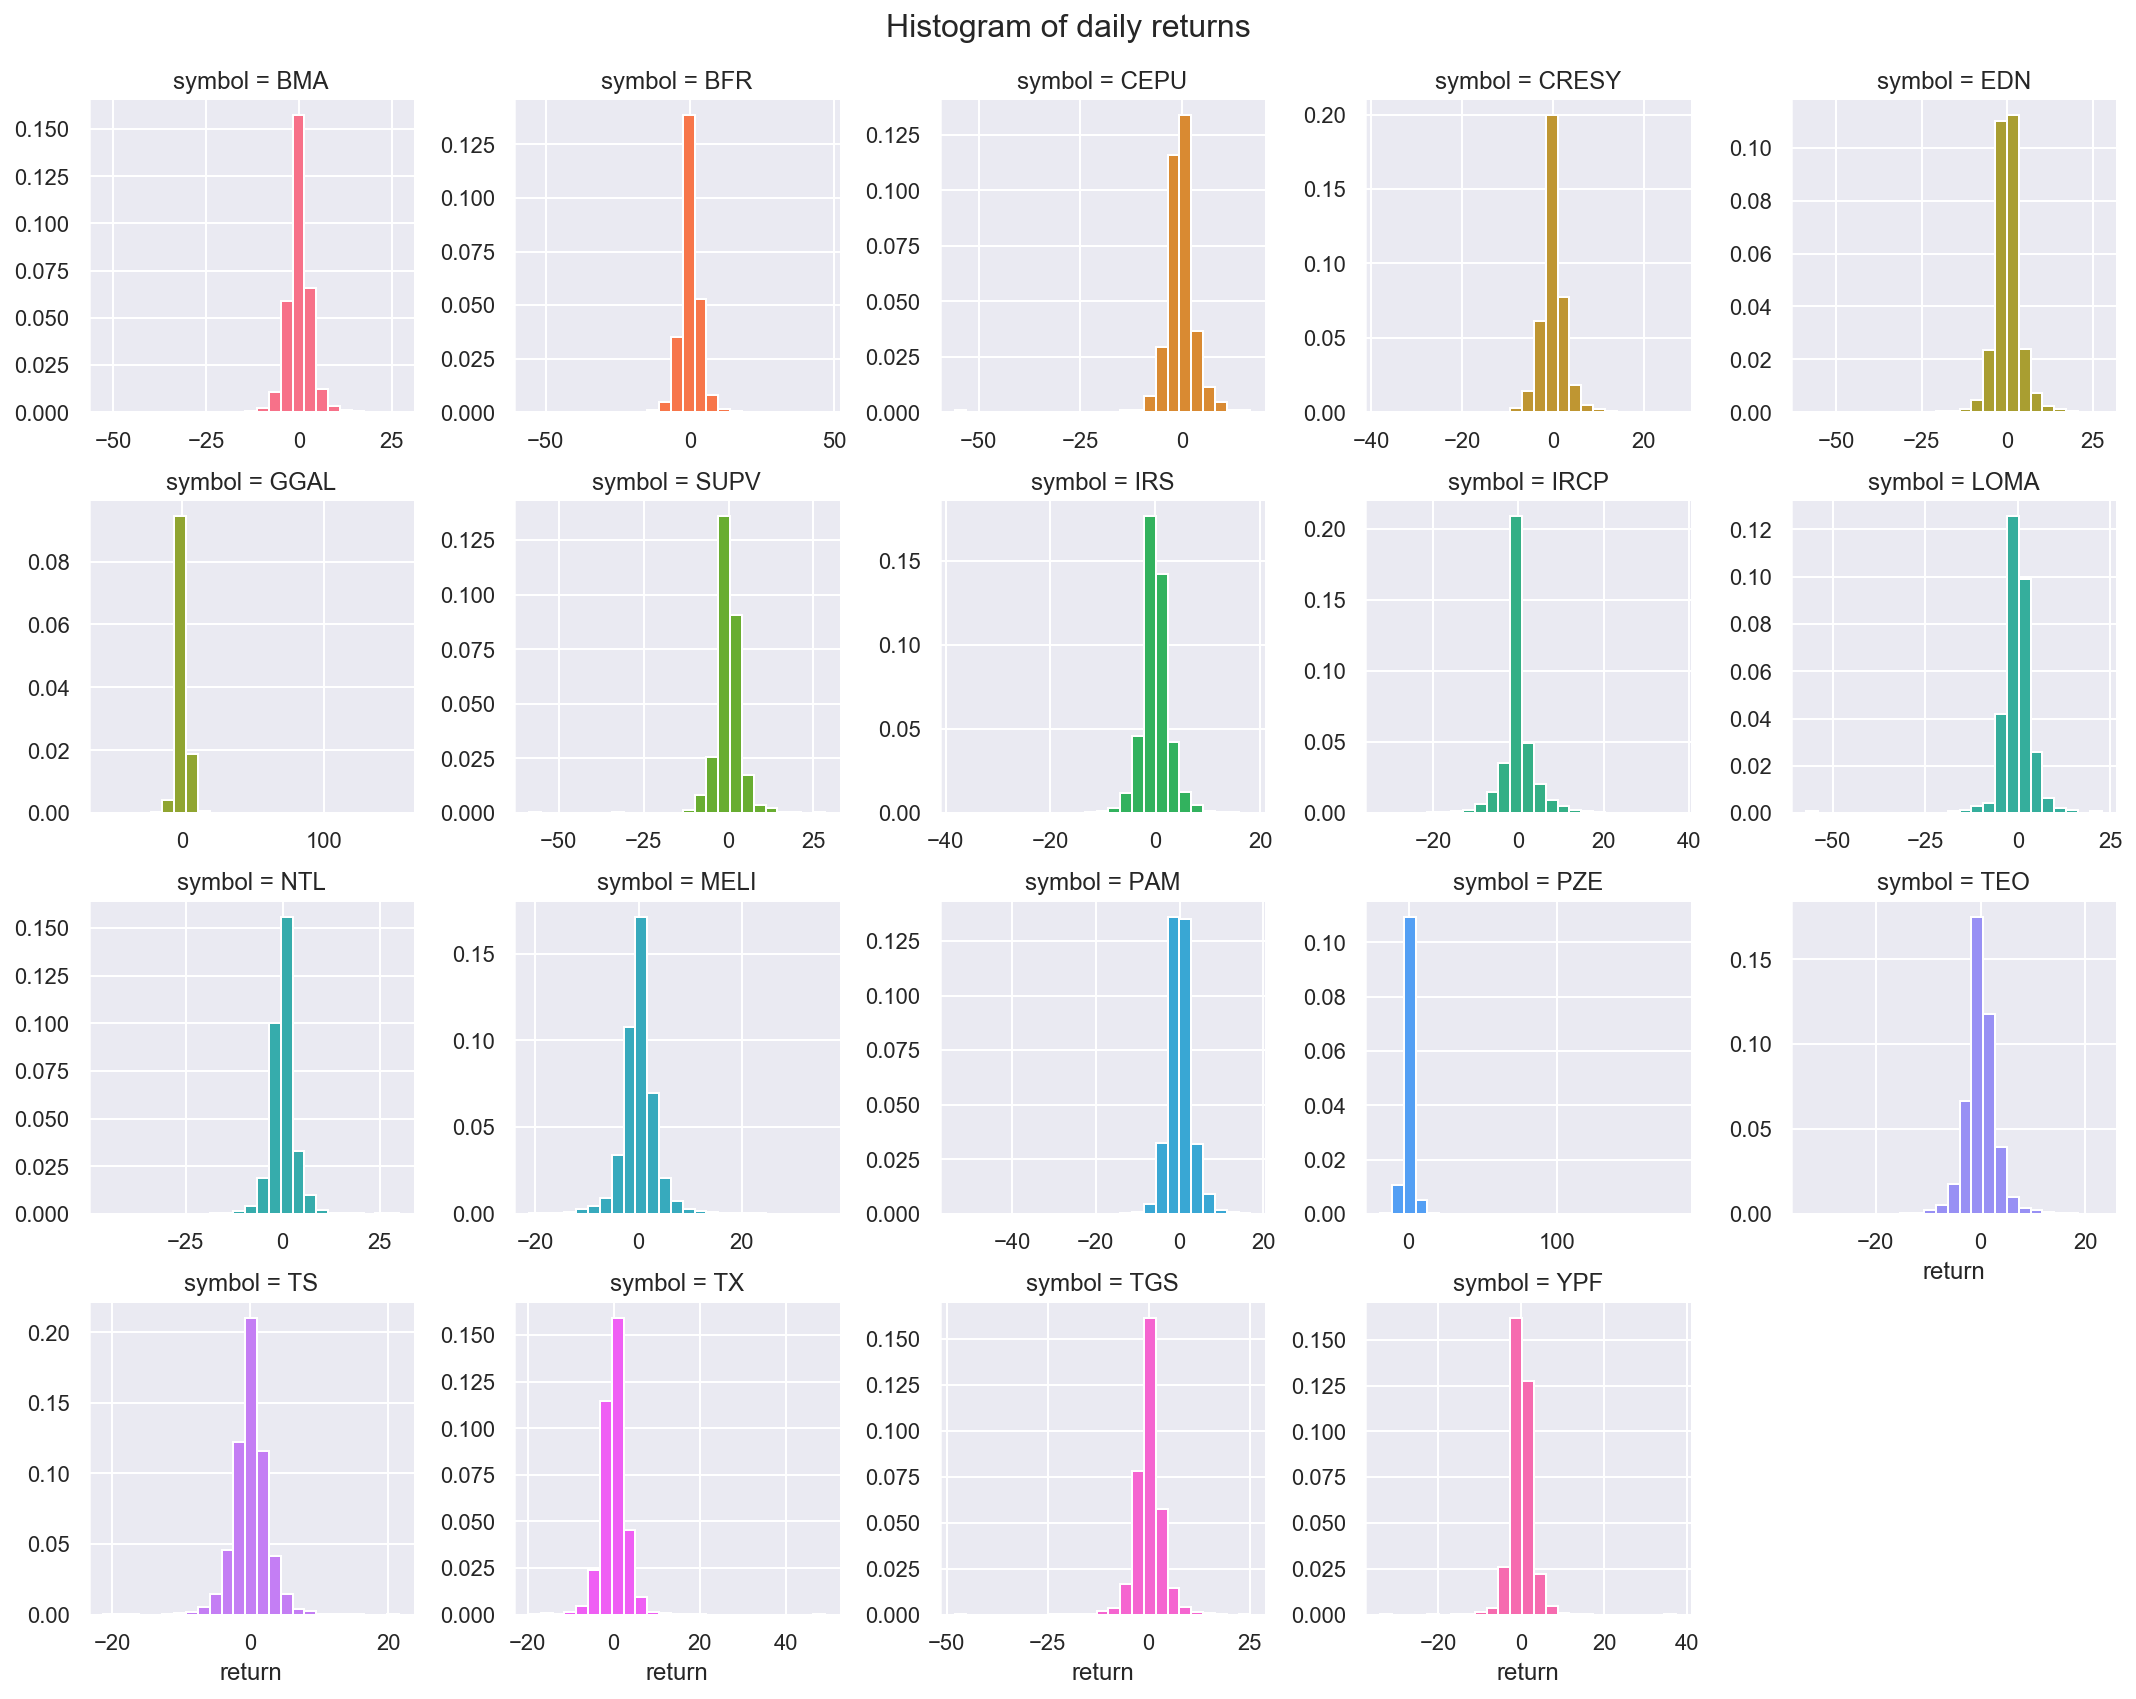

In [10]:
g = sns.FacetGrid(adrs_df, col='symbol', col_wrap=5, hue='symbol', sharey=False, sharex=False)
g.map(plt.hist, 'return', bins=25, density=True)

g.fig.suptitle('Histogram of daily returns', size=16)
g.fig.subplots_adjust(top=.93);

We see most returns cluster around 0, with a few outliers. We can visualize them using a [boxenplot](https://vita.had.co.nz/papers/letter-value-plot.html).

In [11]:
# Workaround to suppress matplotlib errors
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

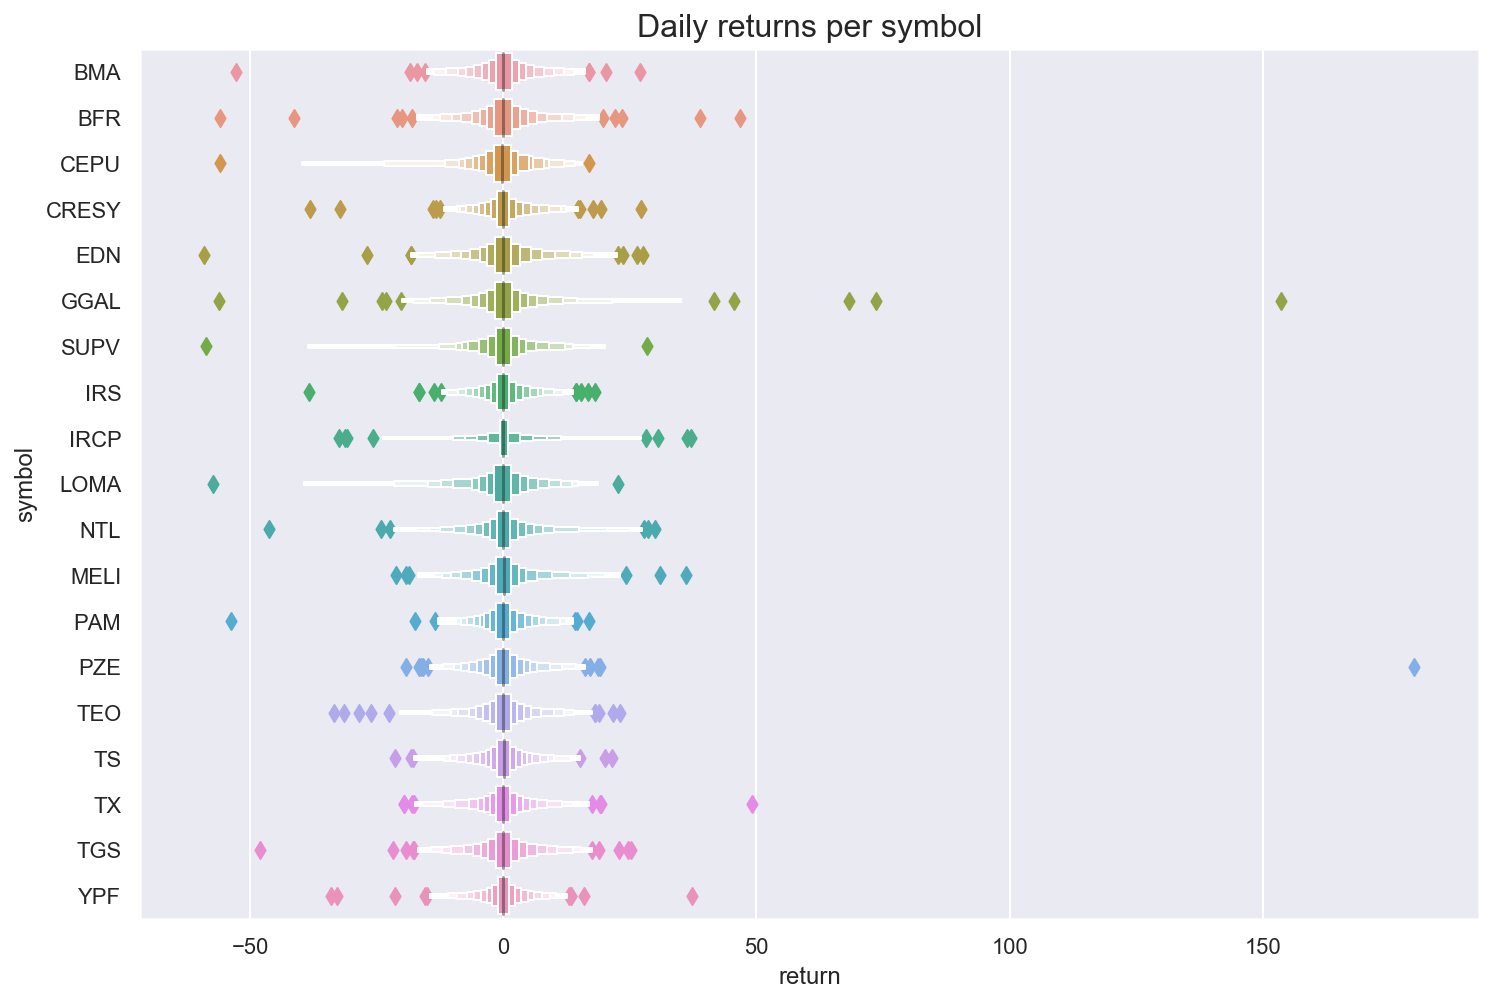

In [12]:
sns.boxenplot(y='symbol', x='return', data=adrs_df, scale='area',
              orient='h').set_title('Daily returns per symbol', size=16);

We can filter the days with 30% or larger movement in prices (either up or down).

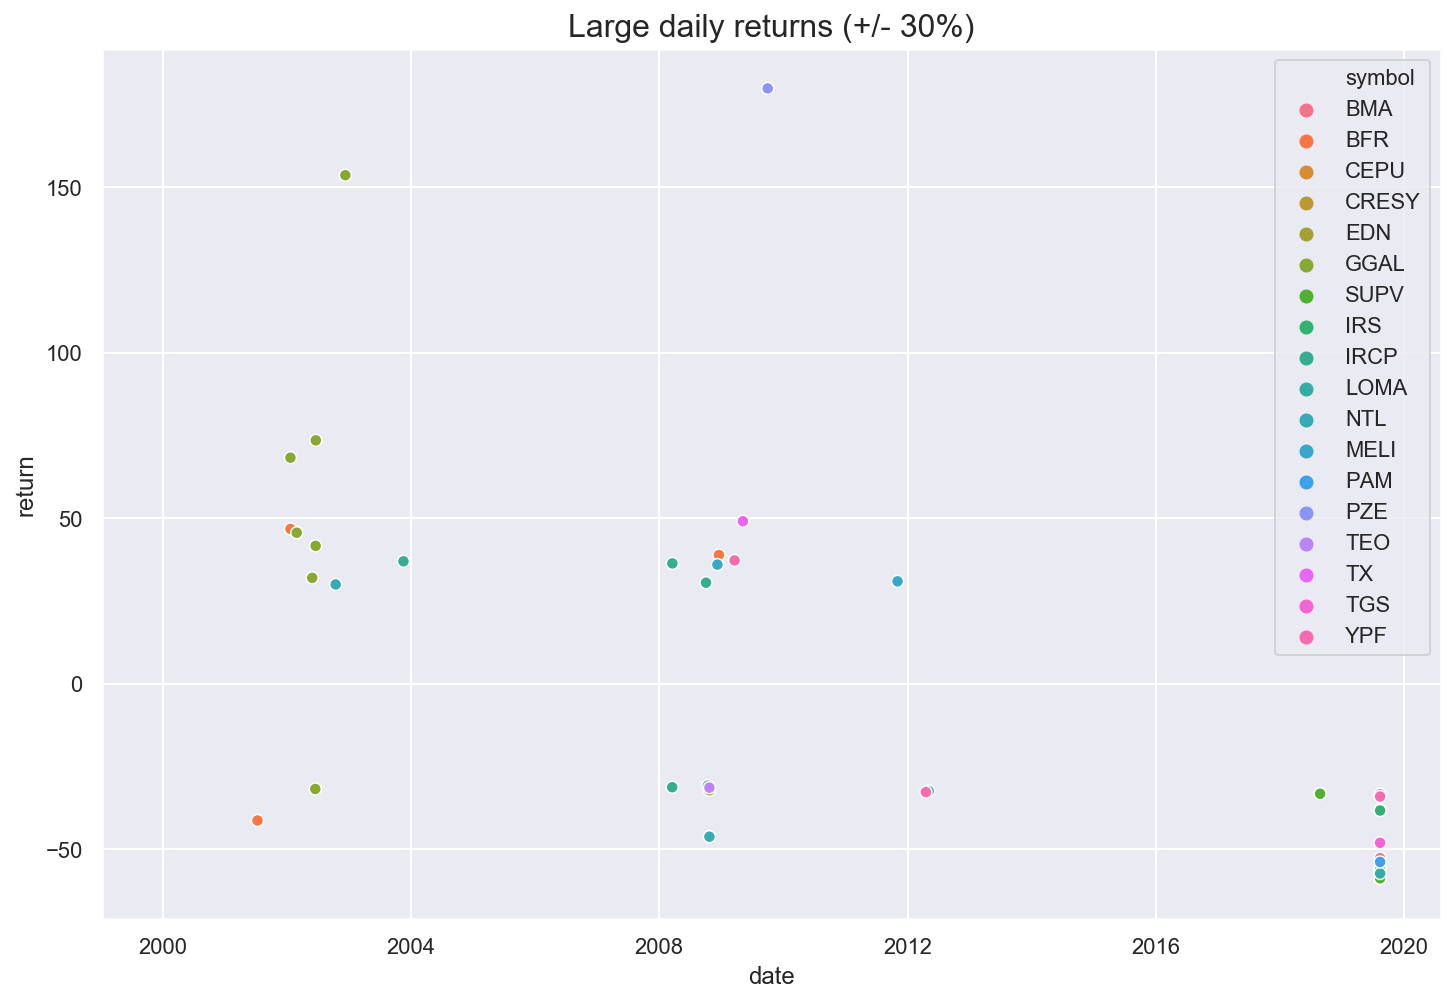

In [13]:
large_movements = adrs_df.loc[adrs_df['return'].abs() >= 30]
sns.scatterplot(x=large_movements.index,
                y='return',
                hue='symbol',
                data=large_movements).set_title(
                    'Large daily returns (+/- 30%)', size=16);

Now if we remove outliers, say discard days where return was higher than 10% or lower than -10%:

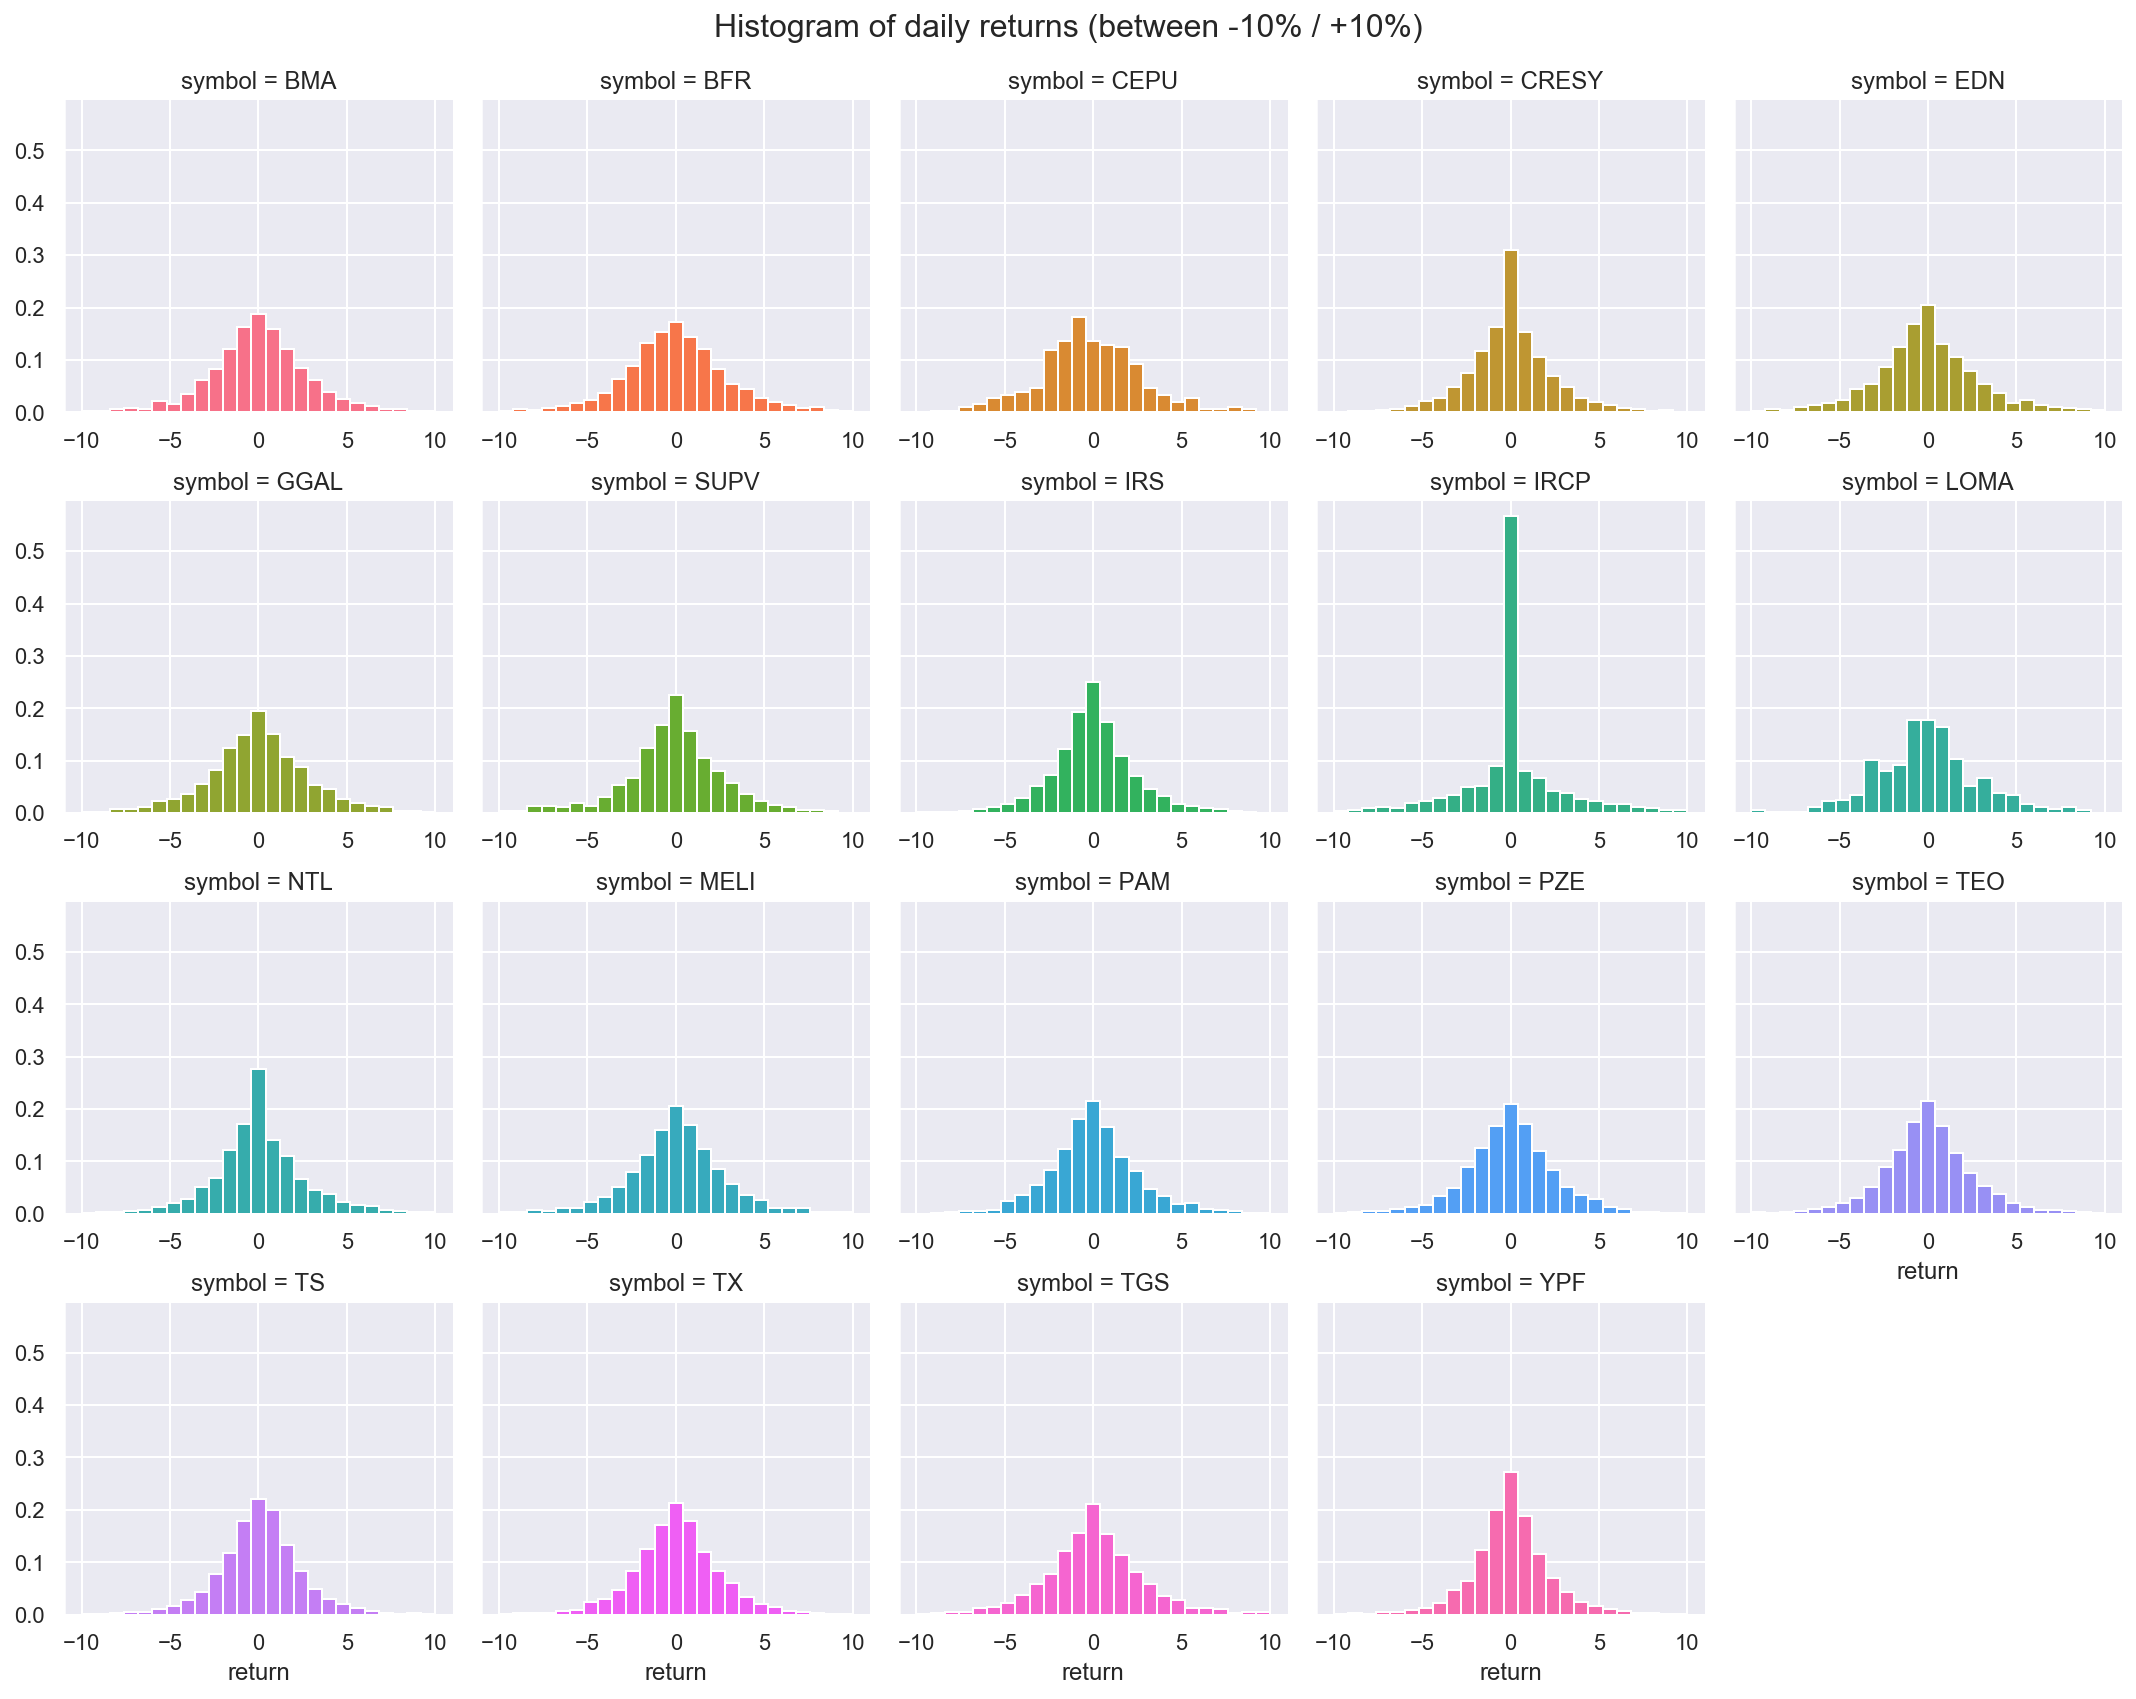

In [14]:
g = sns.FacetGrid(adrs_df, col='symbol', col_wrap=5, hue='symbol', sharex=False)
g.map(plt.hist, 'return', bins=25, density=True, range=(-10,10))

g.fig.suptitle('Histogram of daily returns (between -10% / +10%)', size=16)
g.fig.subplots_adjust(top=.93);

In finance, it is common to look at the _log returns_ of an asset. Stock prices are assumed to follow a [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution) distribution, hence we should expect log returns to be distributed [normally](https://en.wikipedia.org/wiki/Normal_distribution).

$$ln(S_T)\sim N\big[ln(S_0)+(\mu-\frac{\sigma^2}{2})T,\;\sigma^2T\big] \\
ln(\frac{S_T}{S_0})\sim N\big[(\mu-\frac{\sigma^2}{2})T, \;\sigma^2T\big]$$

Where $S_T$ is the price of the underlying at time $T$.  
For a more detailed discussion on the assumptions of the [Black-Scholes-Merton](https://en.wikipedia.org/wiki/Black–Scholes_model) model, see chapter 15 of _Options, Futures and Other Derivatives_ (9th Ed) by John Hull.  
You can read more on the distribution of prices and returns [here](https://www.investopedia.com/articles/investing/102014/lognormal-and-normal-distribution.asp).

In [15]:
adrs_df['log_return'] = np.log(adrs_df['return'] / 100 + 1.)

Now we can calculate the [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) $\sigma$ for each symbol, defined as the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of log returns.  
As a comparison, we'll add the daily volatility (from 2000 to 2018) for the [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) index, a stock market index that measures the stock performance of the 500 largest publicly traded companies in the United States.

In [16]:
spx_df = pd.read_csv(os.path.join(data_dir, 'spx_2000-2018.csv'),
                     index_col='date',
                     parse_dates=['date'])
spx_df['log_return'] = np.log(spx_df['price'] / spx_df['price'].shift(1))

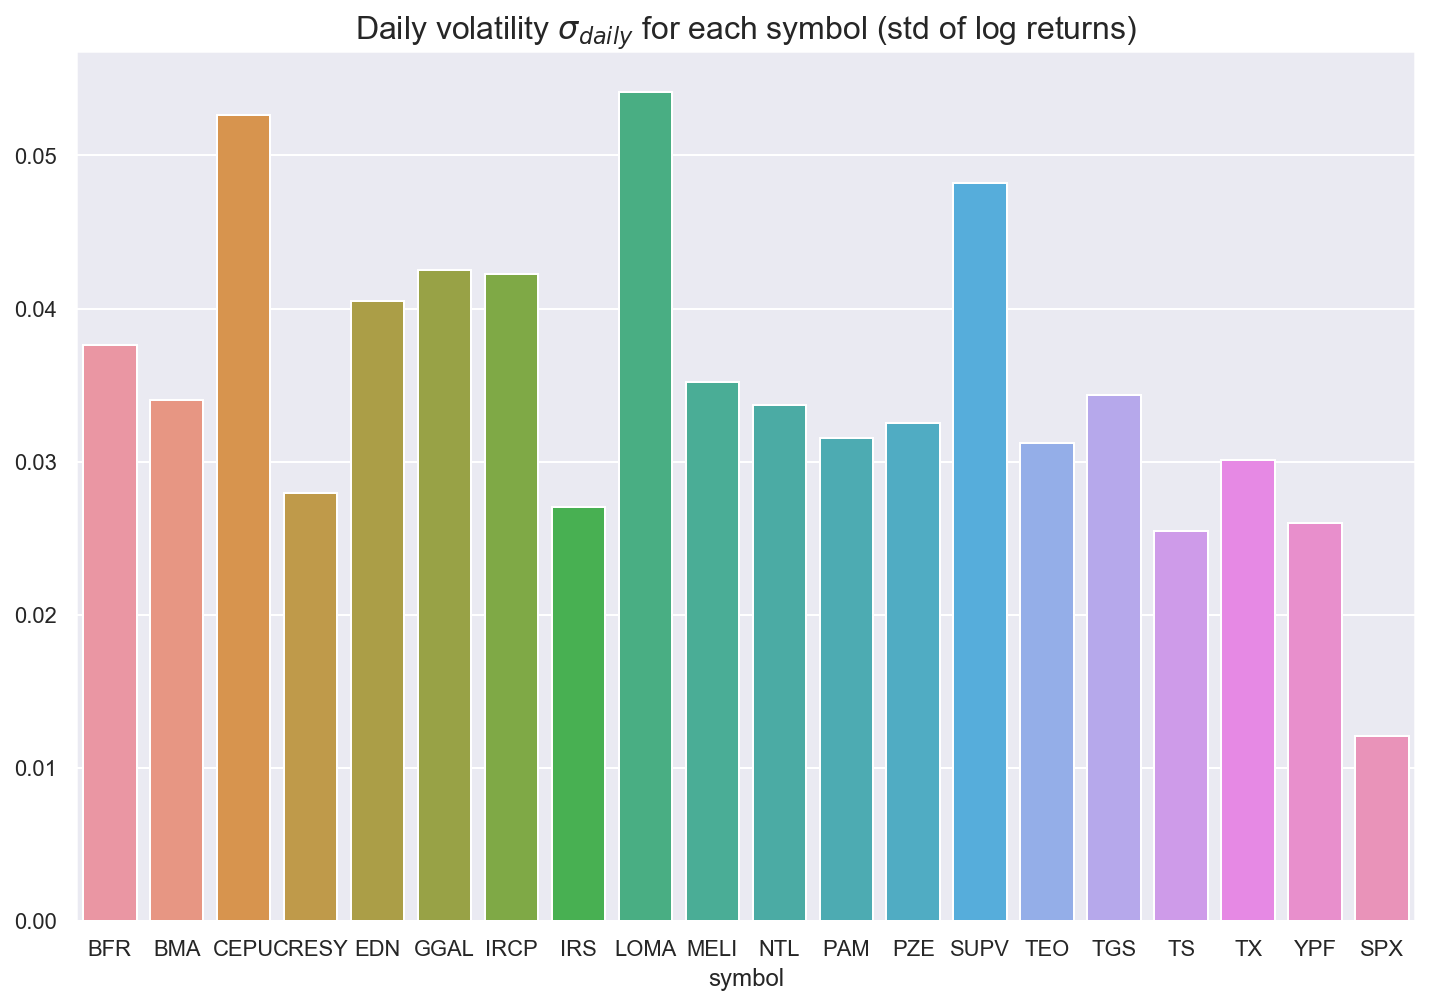

In [17]:
adr_volatility = adrs_df.groupby('symbol')['log_return'].std()
adr_volatility['SPX'] = spx_df['log_return'].std()

sns.barplot(x=adr_volatility.index, y=adr_volatility.values).set_title(
    'Daily volatility $\sigma_{daily}$ for each symbol (std of log returns)',
    size=16);

We can see that Argentine stocks show much higher volatility than the S&P index.

Let's plot the mean yearly returns for each symbol. Again, we'll add the mean daily return of \$SPX as a benchmark.

In [18]:
yearly_rets = np.exp(adrs_df.groupby('symbol')['log_return'].resample('Y', label='right').sum()) - 1
yearly_rets = yearly_rets.reset_index()
yearly_rets['return %'] = yearly_rets['log_return'] * 100

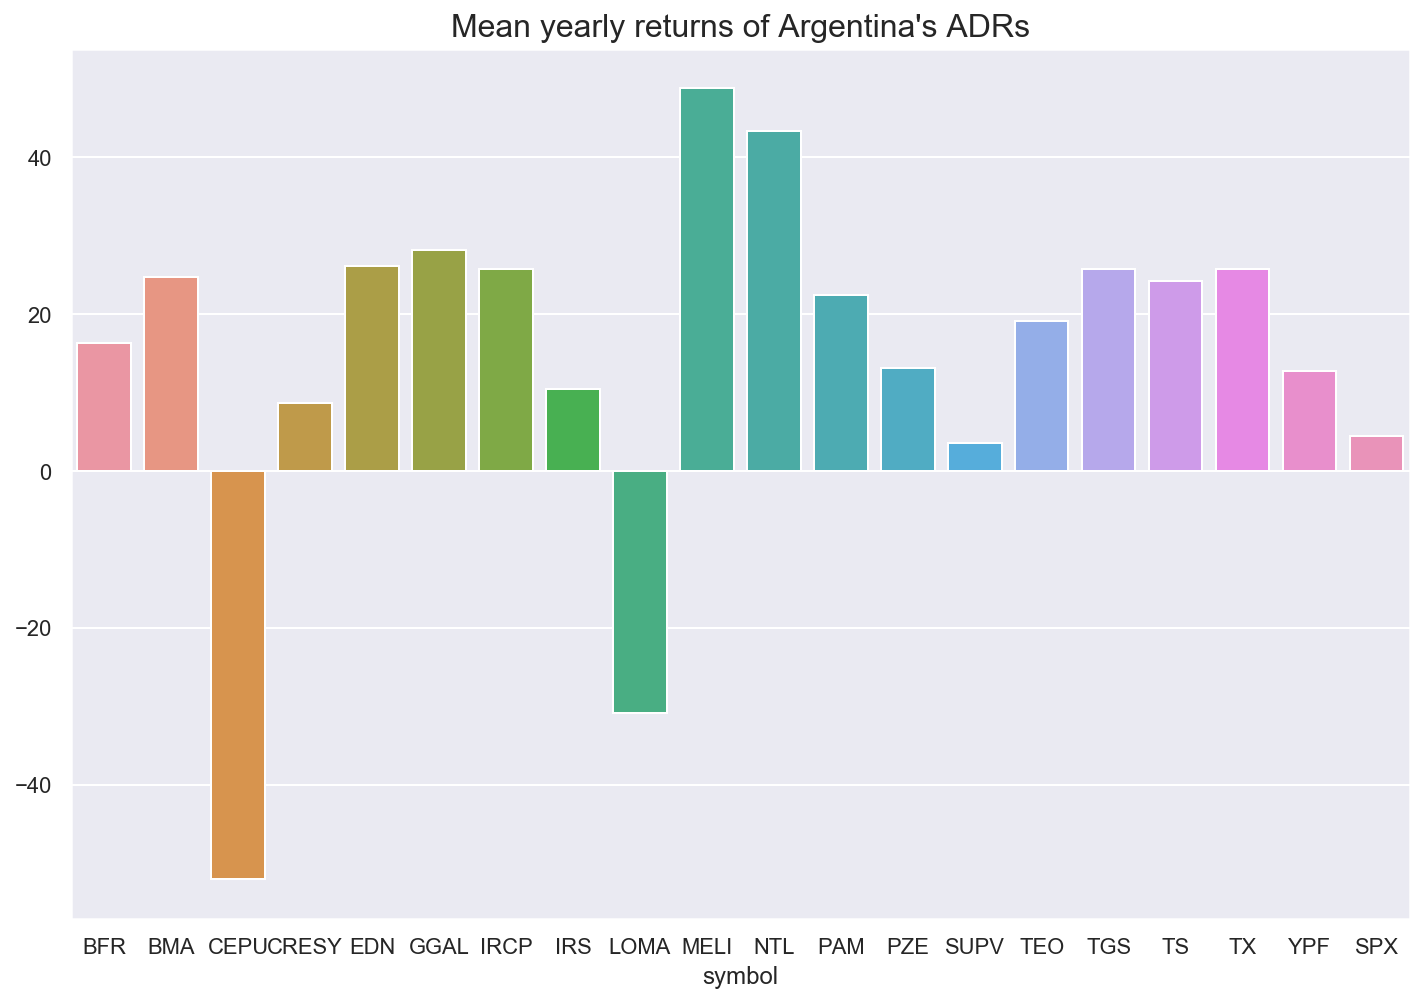

In [19]:
mean_rets = yearly_rets.groupby('symbol')['return %'].mean()
mean_rets['SPX'] = (
    (np.exp(spx_df.resample('Y', label='right')['log_return'].sum()) - 1) *
    100).mean()
sns.barplot(x=mean_rets.index, y=mean_rets.values).set_title(
    "Mean yearly returns of Argentina's ADRs", size=16);

As expected, besides increased volatility, Argentine stocks, for the most part, exhibit higher yearly returns.

### A closer look at outliers

Let's plot the returns that are $3\sigma$ away from the mean. If log returns were truly distributed normally, then we should expect $99.7\%$ of them to lie in the interval $(\mu_R - 3\sigma \mu_R, \mu_R + 3\sigma \mu_R)$.

In [20]:
def outlier_filter(symbol_df):
    symbol = symbol_df['symbol'].iloc[0]
    return symbol_df.loc[symbol_df['log_return'].abs() >= 3 * adr_volatility[symbol]]

outliers = adrs_df.groupby('symbol').apply(outlier_filter).reset_index(level=0, drop=True)

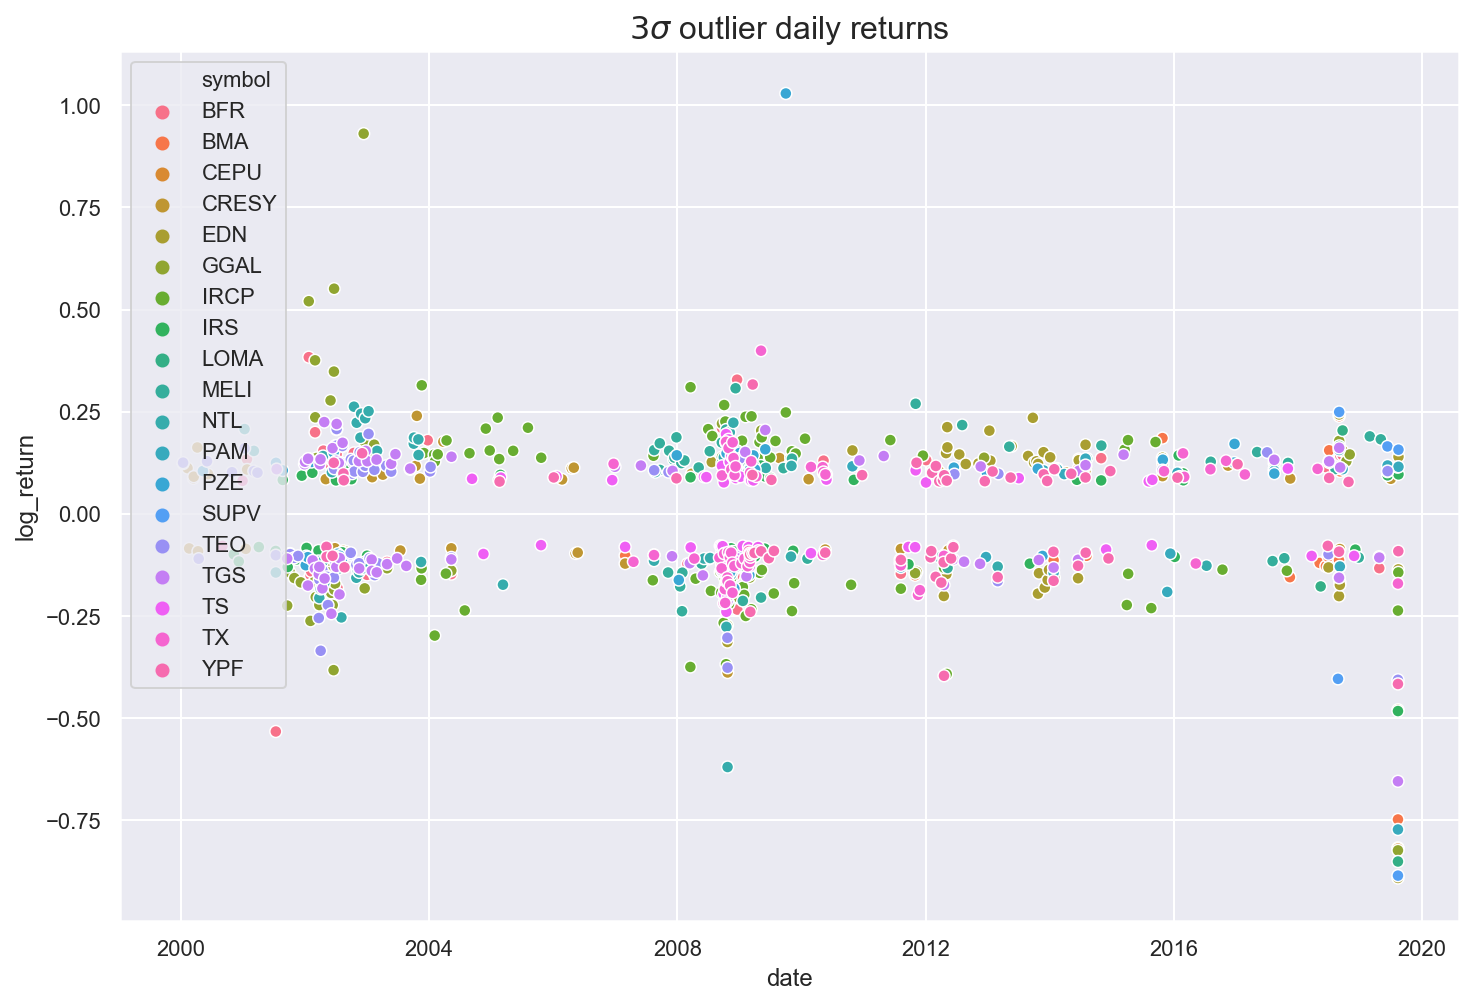

In [21]:
sns.scatterplot(x=outliers.index, y='log_return', hue='symbol',
                data=outliers).set_title('$3\sigma$ outlier daily returns',
                                         size=16);

We see a large number of outlier return days. To put that in perspective, let's calculate the proportion of outlier returns for each symbol in the data, that is the number of days where $3\sigma$ returns where observed over the total number of observations.

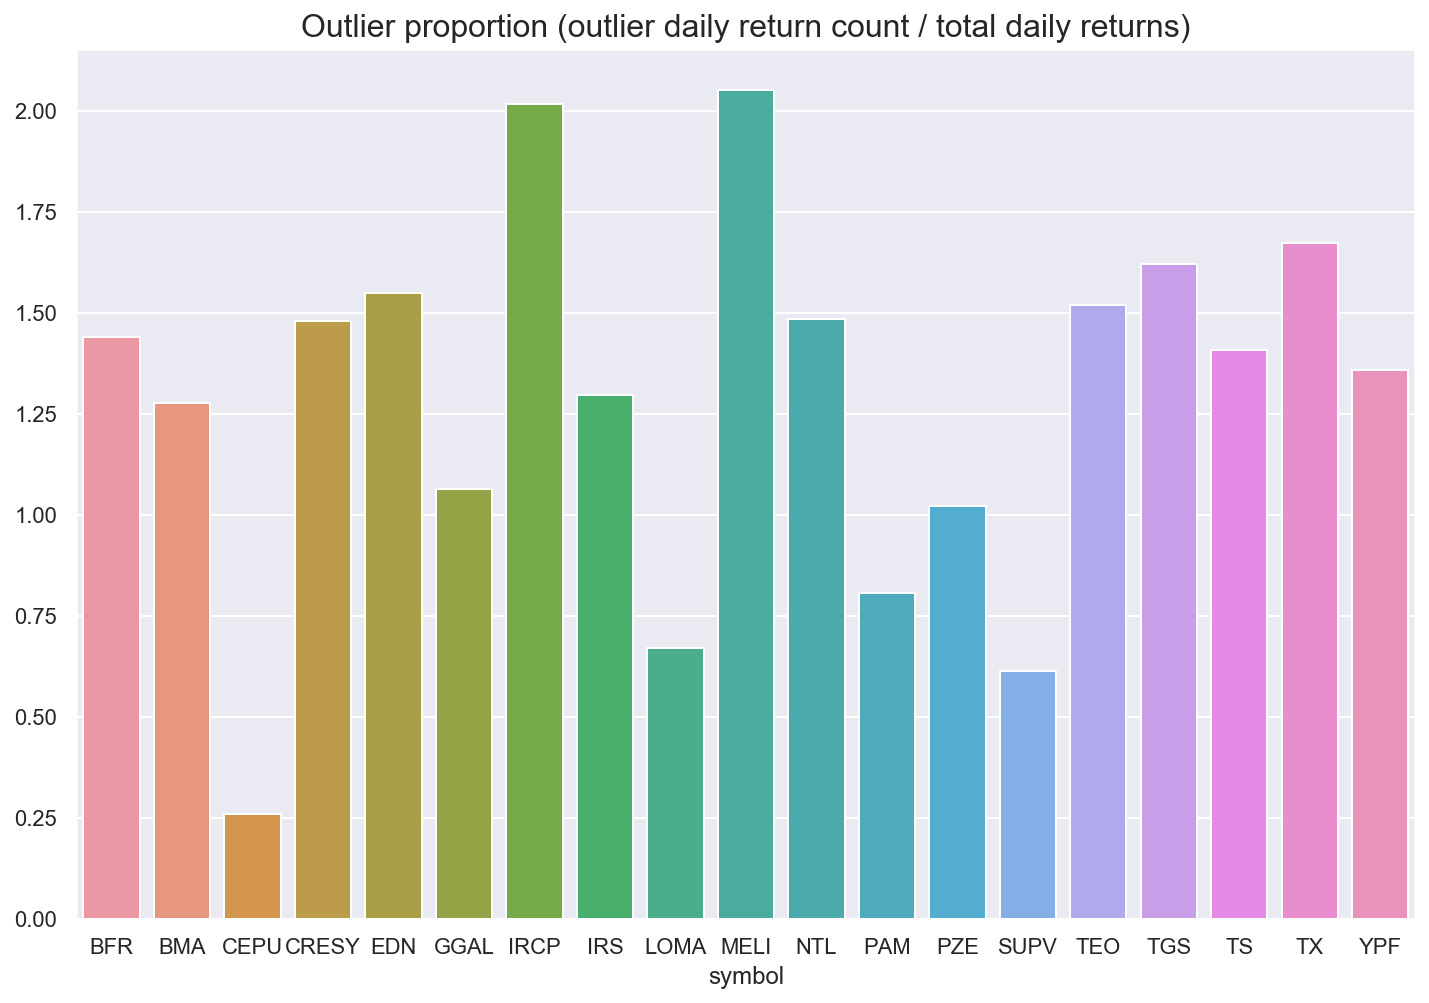

In [22]:
outlier_count = outliers.groupby('symbol')['log_return'].count()
ret_count = adrs_df.groupby('symbol')['log_return'].count()

outlier_pct = 100 * outlier_count / ret_count
sns.barplot(x=outlier_pct.index, y=outlier_pct.values).set_title(
    'Outlier proportion (outlier daily return count / total daily returns)',
    size=16);

We see many more outliers than expected. \$MELI has almost 7 times more outlier return days than expected if we assumed normal log returns.

Finally, we'll look at the cumulative log returns over time.

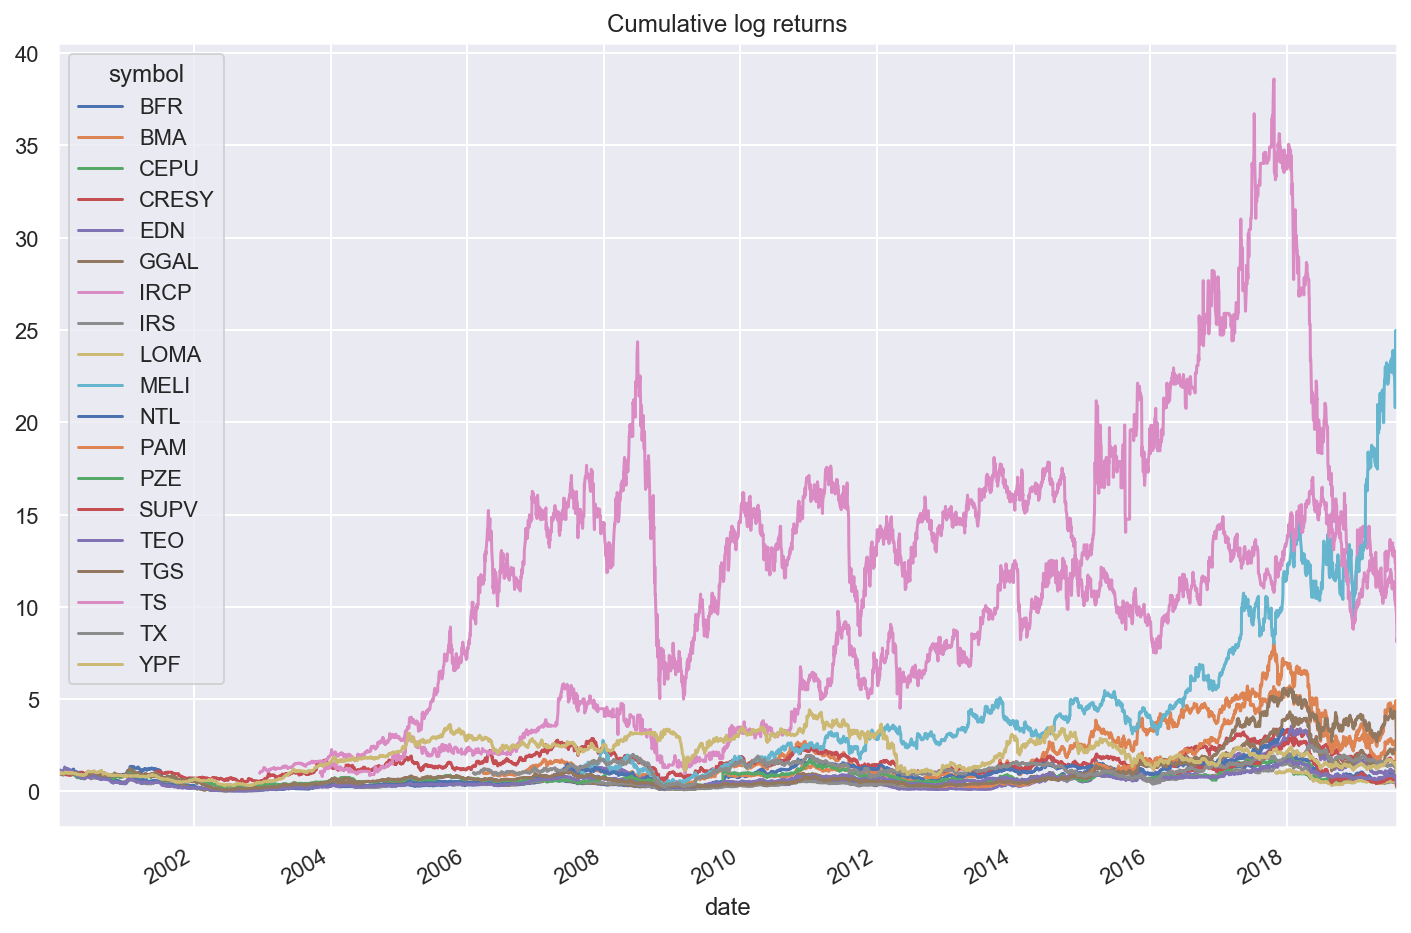

In [23]:
pivoted = adrs_df.pivot(columns='symbol', values='log_return')
pivoted.cumsum().apply(np.exp).plot(title='Cumulative log returns');

If you had invested in \\$MELI's IPO in 2007, you've have over 25 times your initial investment by August 2019. You would also have to stomach losing close to 60% at the end of 2008.

### ADR options and the volatility smile

Now we'll examine the options end-of-day data for the ADRs. [Options](https://www.investopedia.com/terms/o/option.asp) are derivative contracts based on an underlying asset such as stocks. They offer the buyer the opportunity to buy or sell the underlying asset at a given price (_strike price_). You can find more information on options in [this notebook](../intro-finance.ipynb).

In [24]:
adr_options = pd.read_csv(os.path.join(data_dir, 'adr_options.csv'),
                          index_col='quotedate',
                          parse_dates=['quotedate', 'expiration'])
adr_options.head()

underlying  underlying_last exchange          optionroot  type  \
quotedate                                                                   
2019-07-03        TEO            17.79     CBOE  TEO190719C00002500  call   
2019-07-03        TEO            17.79     CBOE  TEO190719C00005000  call   
2019-07-03        TEO            17.79     CBOE  TEO190719C00007500  call   
2019-07-03        TEO            17.79     CBOE  TEO190719C00010000  call   
2019-07-03        TEO            17.79     CBOE  TEO190719C00012500  call   

           expiration  strike  last  net   bid   ask  volume  openinterest  \
quotedate                                                                    
2019-07-03 2019-07-19     2.5   0.0  0.0  13.0  17.8       0             0   
2019-07-03 2019-07-19     5.0   0.0  0.0  10.5  15.2       0             0   
2019-07-03 2019-07-19     7.5   0.0  0.0   8.0  12.8       0             0   
2019-07-03 2019-07-19    10.0   0.0  0.0   5.5  10.2       0             0   
2019-07-03 2019-07-19    12.5   0.0  0.0   3.0   7.8       0           199   

            impliedvol   delta   gamma  
quotedate                               
2019-07-03      0.0200  1.0000  0.0000  
2019-07-03      6.3229  0.9446  0.0045  
2019-07-03      3.5717  0.9336  0.0093  
2019-07-03      2.0354  0.9375  0.0156  
2019-07-03      1.2856  0.9215  0.0297

The options data is also indexed by date. These are the most important columns:
- `underlying`: The ticker of the underlying asset.
- `underlying_last`: The last quoted price of the underlying asset.
- `optionroot`: The name of the contract.
- `type`: Contract type (_put_ or _call_)
- `strike`: The price at which owner can execute (buy/sell underlying).
- `expiration`: Date of expiration of the option.
- `bid`: The price at which investor can _sell_ this contract.
- `ask`: The price at which investor can _buy_ this contract.
- `openinterest`: The total number of contract outstanding.
- `impliedvol`: Volatility of the underlying as implied by the option price (according to BSM model)

Let's plot the [volatility smile](https://www.investopedia.com/terms/v/volatilitysmile.asp) for each symbol at 2019-08-09.  
The volatility smile plots the [implied volatility](https://www.investopedia.com/terms/i/iv.asp) (IV, a measure of the volatility of an underlying security as _implied_ by the option prices) at the different strike levels.  
We'll plot the IV for puts and calls for each symbol. The dashed line represents the spot price.

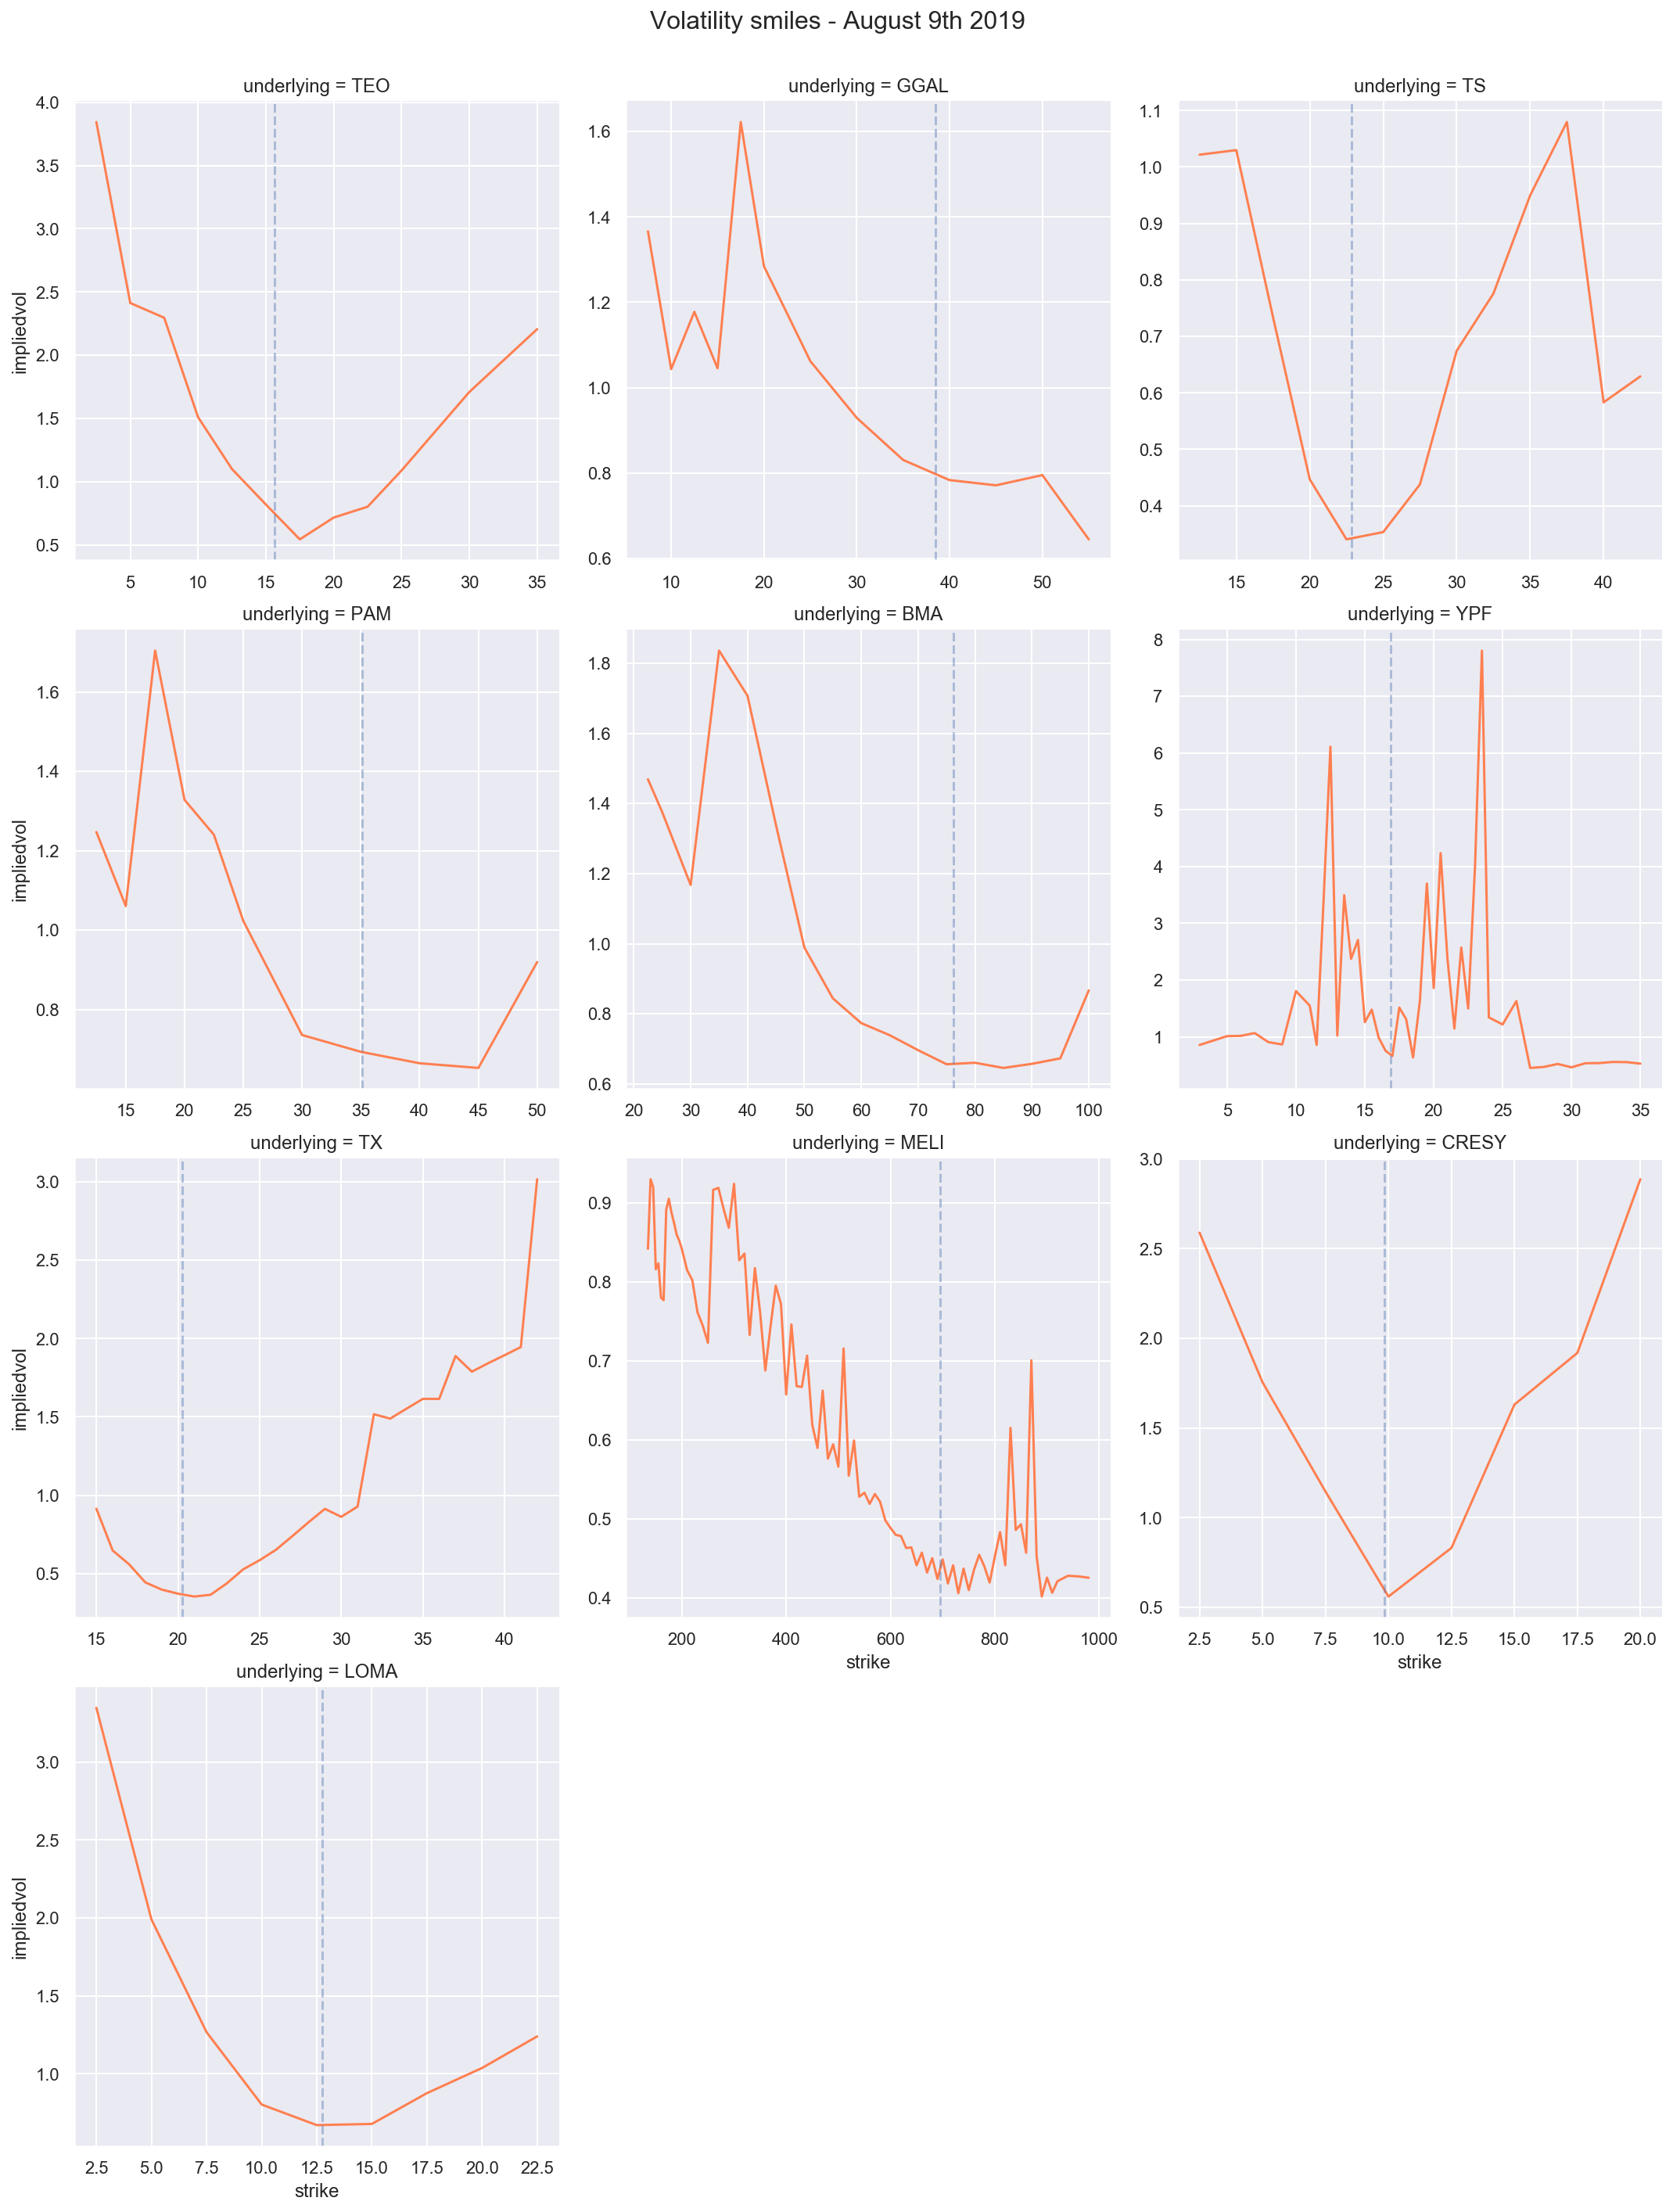

In [25]:
friday_9th = adr_options.loc['2019-08-9']

# Keep puts with K <= spot and calls with K > spot
friday_9th = friday_9th.query(
    '((type == "put") & (strike <= underlying_last)) | ((type == "call") & (strike > underlying_last))'
)

g = sns.relplot(x='strike', y='impliedvol', col='underlying',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3,
            kind='line', data=friday_9th, ci=None, color='coral')

for ax, symbol in zip(g.axes, g.col_names):
    spot_price = friday_9th.loc[friday_9th['underlying'] == symbol, 'underlying_last'].iloc[0]
    ax.axvline(spot_price, alpha=0.4, linestyle='--')
    
g.fig.suptitle('Volatility smiles - August 9th 2019', size=16)
g.fig.subplots_adjust(top=.94);

We see that as options move more [at the money](https://www.investopedia.com/terms/a/atthemoney.asp) (ATM) their implied volatility drops. In contrast, options that are further [out of the money](https://www.investopedia.com/terms/o/outofthemoney.asp) (OTM) or in the money (ITM) have higher IVs.

Now let's try the the same plot for the following Monday (2019-08-12). That day, the [MERVAL](https://en.wikipedia.org/wiki/MERVAL) (an index that tracks the biggest companies listed in the Buenos Aires Stock Exchange) crashed and lost close to 50% of its USD value.

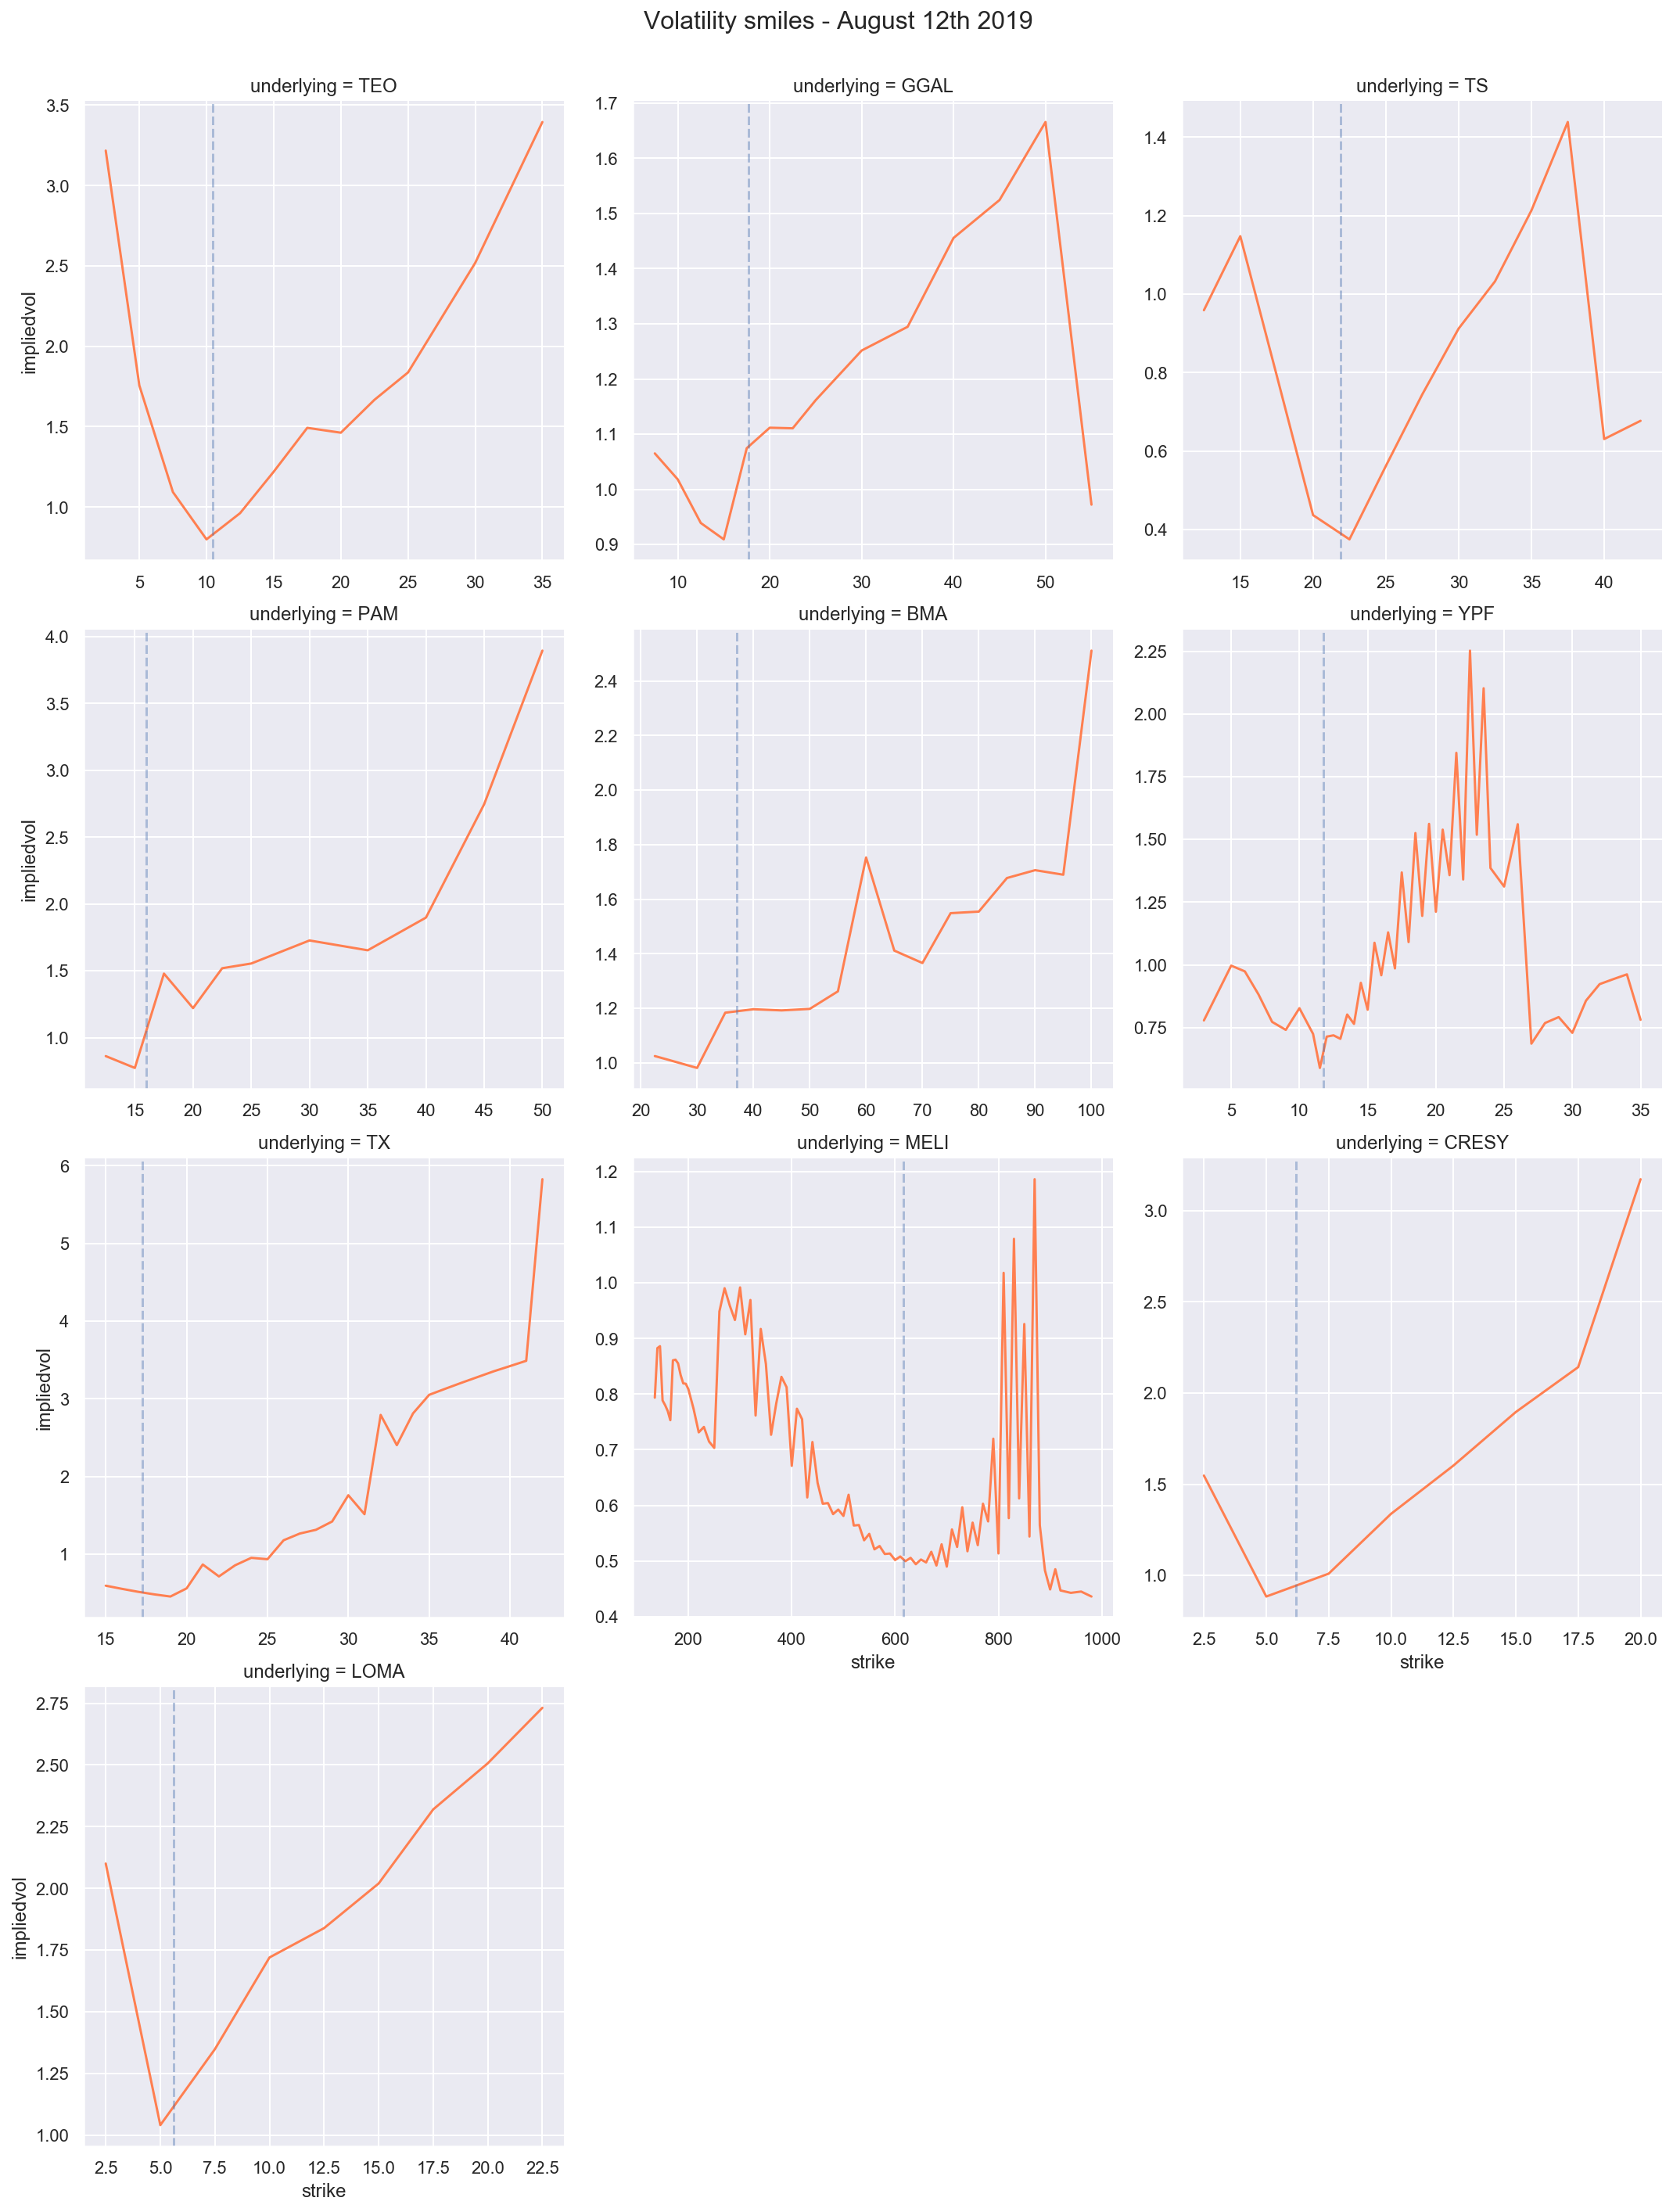

In [26]:
black_monday = adr_options.loc['2019-08-12']

# Keep puts with K <= spot and calls with K > spot
black_monday = black_monday.query(
    '((type == "put") & (strike <= underlying_last)) | ((type == "call") & (strike > underlying_last))'
)

g = sns.relplot(x='strike', y='impliedvol', col='underlying',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3,
            kind='line', data=black_monday, ci=None, color='coral')

for ax, symbol in zip(g.axes, g.col_names):
    spot_price = black_monday.loc[black_monday['underlying'] == symbol, 'underlying_last'].iloc[0]
    ax.axvline(spot_price, alpha=0.4, linestyle='--')
    
g.fig.suptitle('Volatility smiles - August 12th 2019', size=16)
g.fig.subplots_adjust(top=.94);

### Option price evolution

Next, we'll analyse how option prices changed during the month of August, 2019.
Let's find the 10 most actively traded options (those with the highest open interest) for each symbol at the start of the month.

In [27]:
august_options = adr_options.loc['2019-08']

In [28]:
def filter_active(symbol_df, option_type='call'):
    return symbol_df.loc[symbol_df['type'] == option_type].nlargest(
        n=10, columns='openinterest')

month_start_date = august_options.index.min()
first_trading_day = august_options.loc[month_start_date]
most_active_calls = first_trading_day.groupby('underlying').apply(
    filter_active).reset_index(level=0, drop=True)
most_active_puts = first_trading_day.groupby('underlying').apply(
    lambda df: filter_active(df, 'put')).reset_index(level=0, drop=True)

In [29]:
call_contracts = most_active_calls['optionroot']
put_contracts = most_active_puts['optionroot']

In [30]:
august_active_calls = august_options.loc[august_options['optionroot'].isin(call_contracts)]
august_active_puts = august_options.loc[august_options['optionroot'].isin(put_contracts)]

august_active_calls['day'] = august_active_calls.index.strftime('%d')
august_active_puts['day'] = august_active_puts.index.strftime('%d')

We'll plot the evolution of the ask price for the actively traded calls through August 2019.

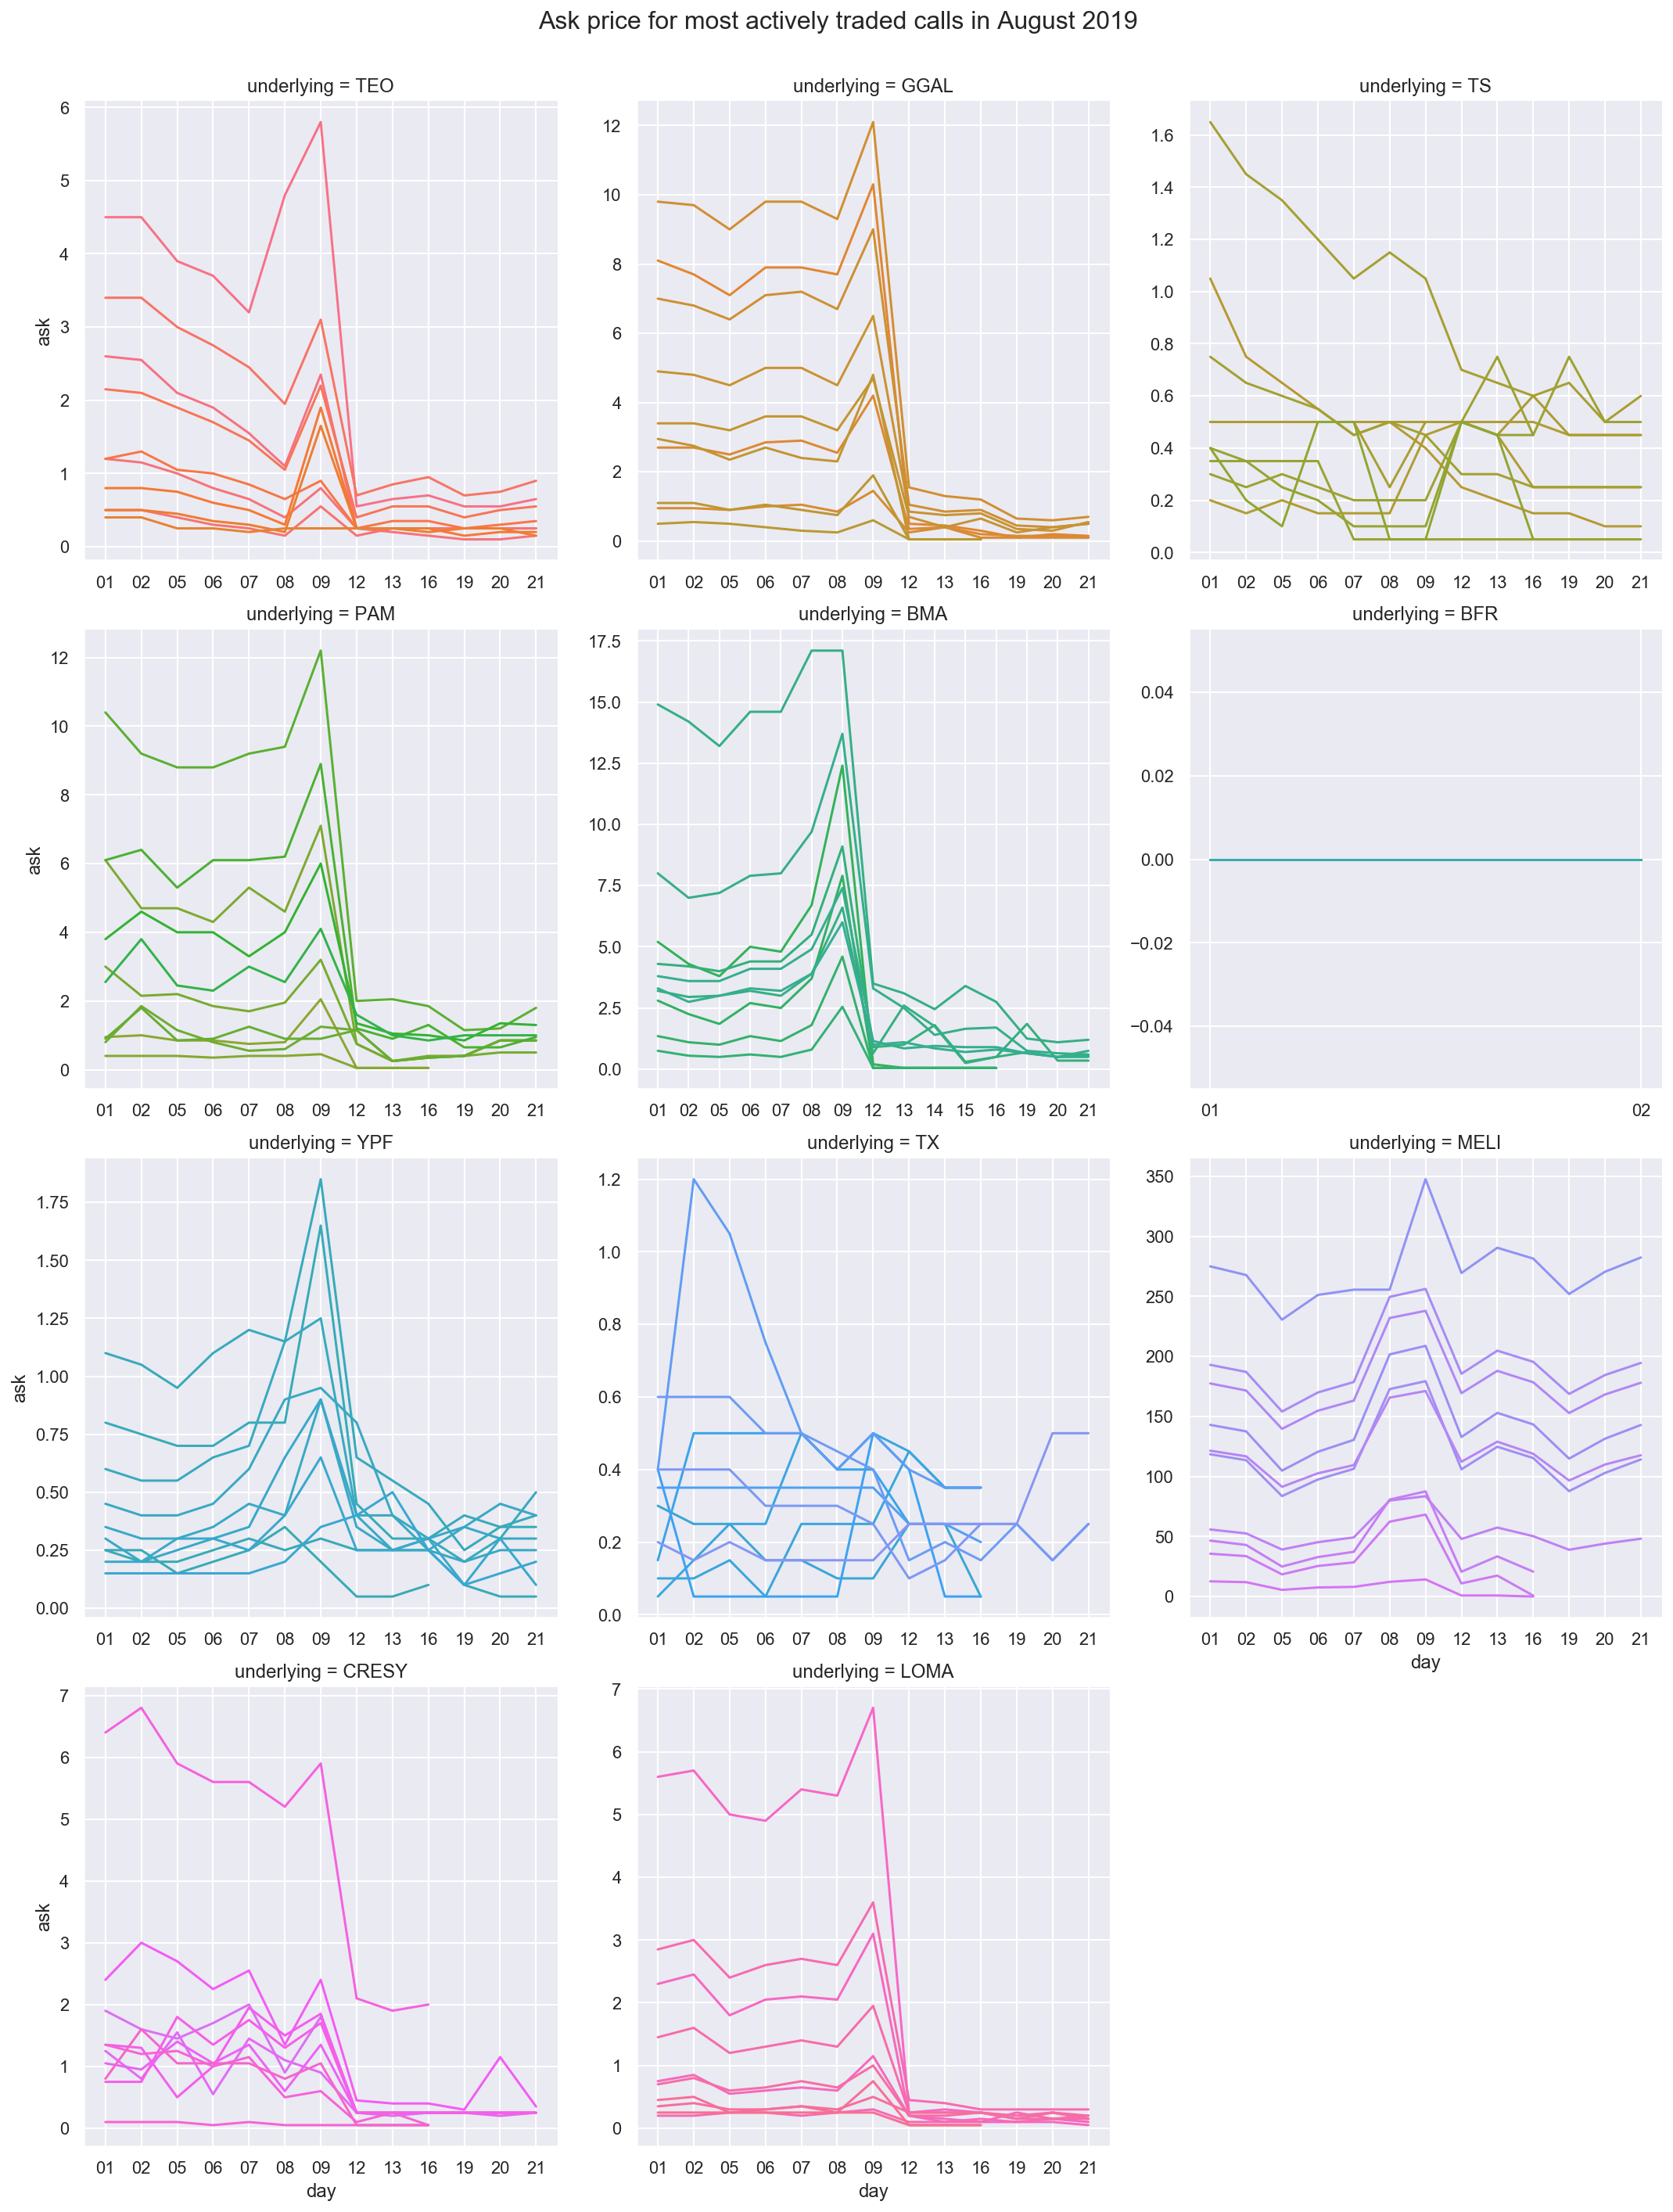

In [31]:
g = sns.relplot(x='day', y='ask', col='underlying', hue='optionroot',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=None,
            kind='line', data=august_active_calls, ci=None)

g.fig.suptitle('Ask price for most actively traded calls in August 2019', size=16)
g.fig.subplots_adjust(top=0.94);

Note that the \\$BFR plot shows all calls with an `ask` price of 0.0. In June 2019, Banco Frances SA [announced](https://finance.yahoo.com/news/bbva-banco-franc-change-ticker-165400264.html) it would  change its ticker symbol from \\$BFR to \\$BBAR. We will update the plots when we get the correct data for the missing months.

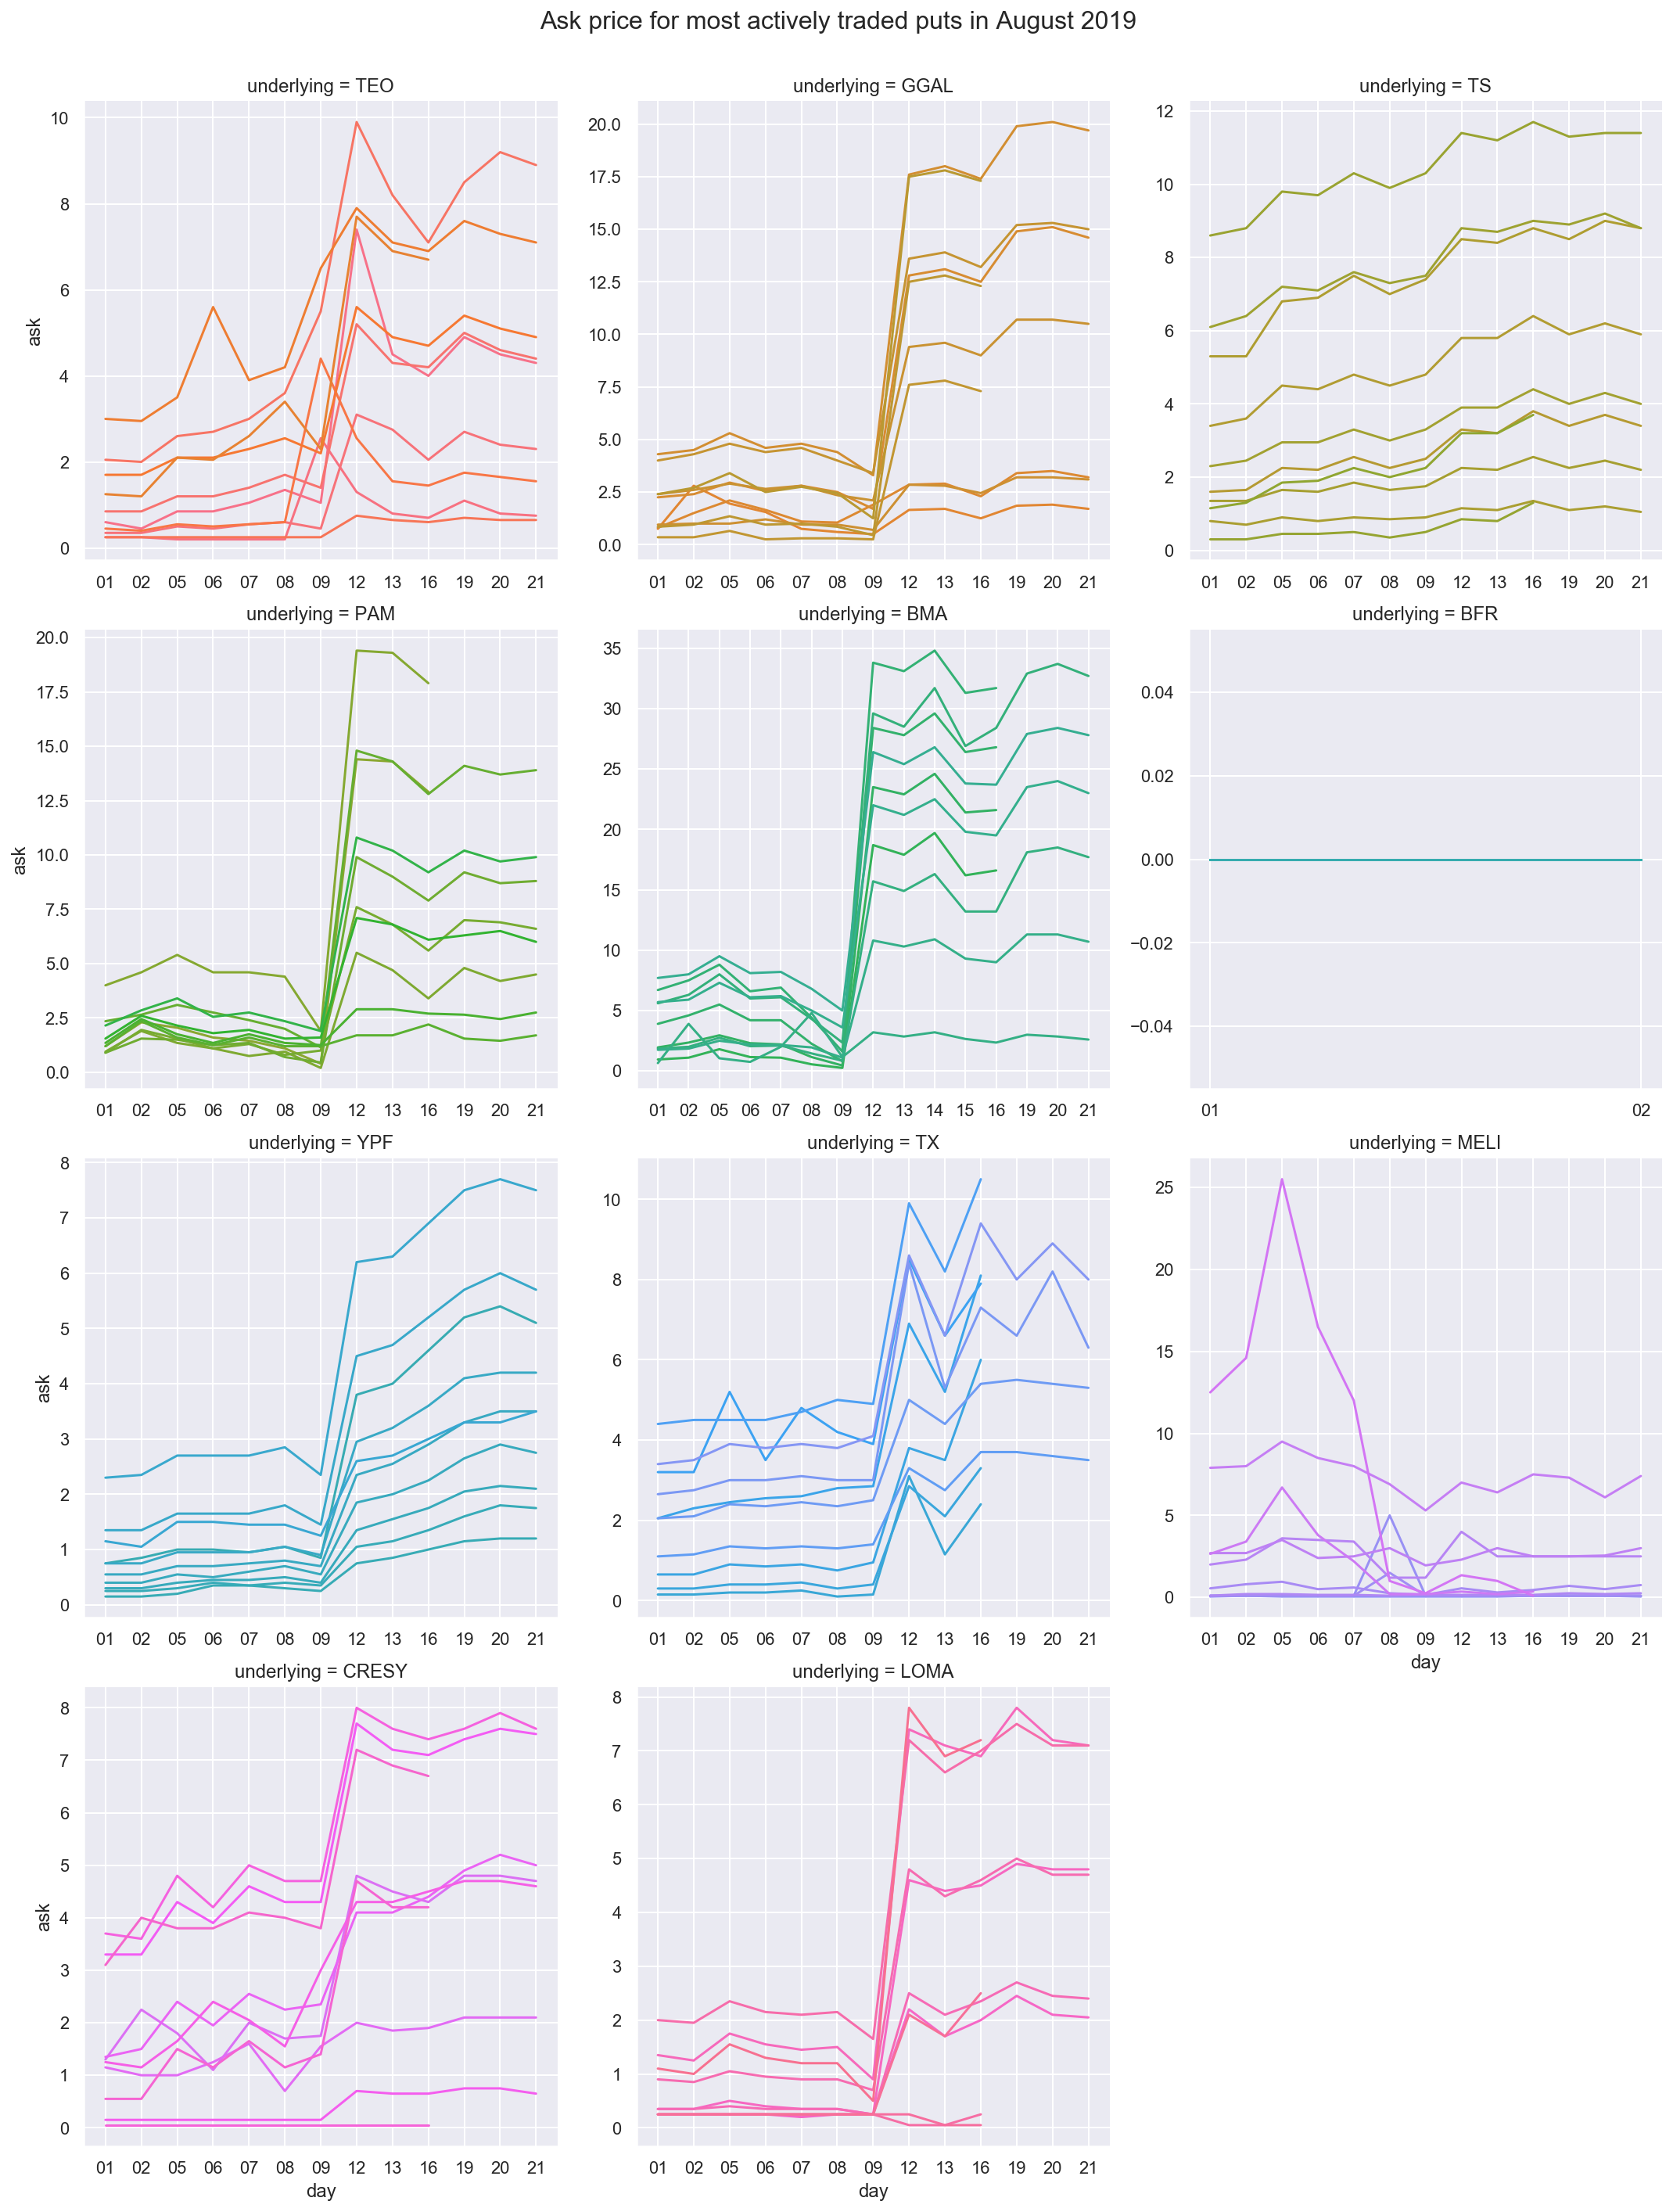

In [32]:
g = sns.relplot(x='day', y='ask', col='underlying', hue='optionroot',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=None,
            kind='line', data=august_active_puts, ci=None)

g.fig.suptitle('Ask price for most actively traded puts in August 2019', size=16)
g.fig.subplots_adjust(top=0.94);

This plots reveal a huge drop in prices for the calls, and, conversely, a large increase in the price of puts, between Friday 9th and Monday 12th.

As a comparison, let's try plotting the option prices for June 2019.

In [33]:
june_options = adr_options.loc['2019-06']

In [34]:
month_start_date = june_options.index.min()
first_trading_day = june_options.loc[month_start_date]
most_active_calls = first_trading_day.groupby('underlying').apply(
    filter_active).reset_index(level=0, drop=True)
most_active_puts = first_trading_day.groupby('underlying').apply(
    lambda df: filter_active(df, 'put')).reset_index(level=0, drop=True)

In [35]:
call_contracts = most_active_calls['optionroot']
put_contracts = most_active_puts['optionroot']

In [36]:
june_active_calls = june_options.loc[june_options['optionroot'].isin(call_contracts)]
june_active_puts = june_options.loc[june_options['optionroot'].isin(put_contracts)]

june_active_calls['day'] = june_active_calls.index.strftime('%d')
june_active_puts['day'] = june_active_puts.index.strftime('%d')

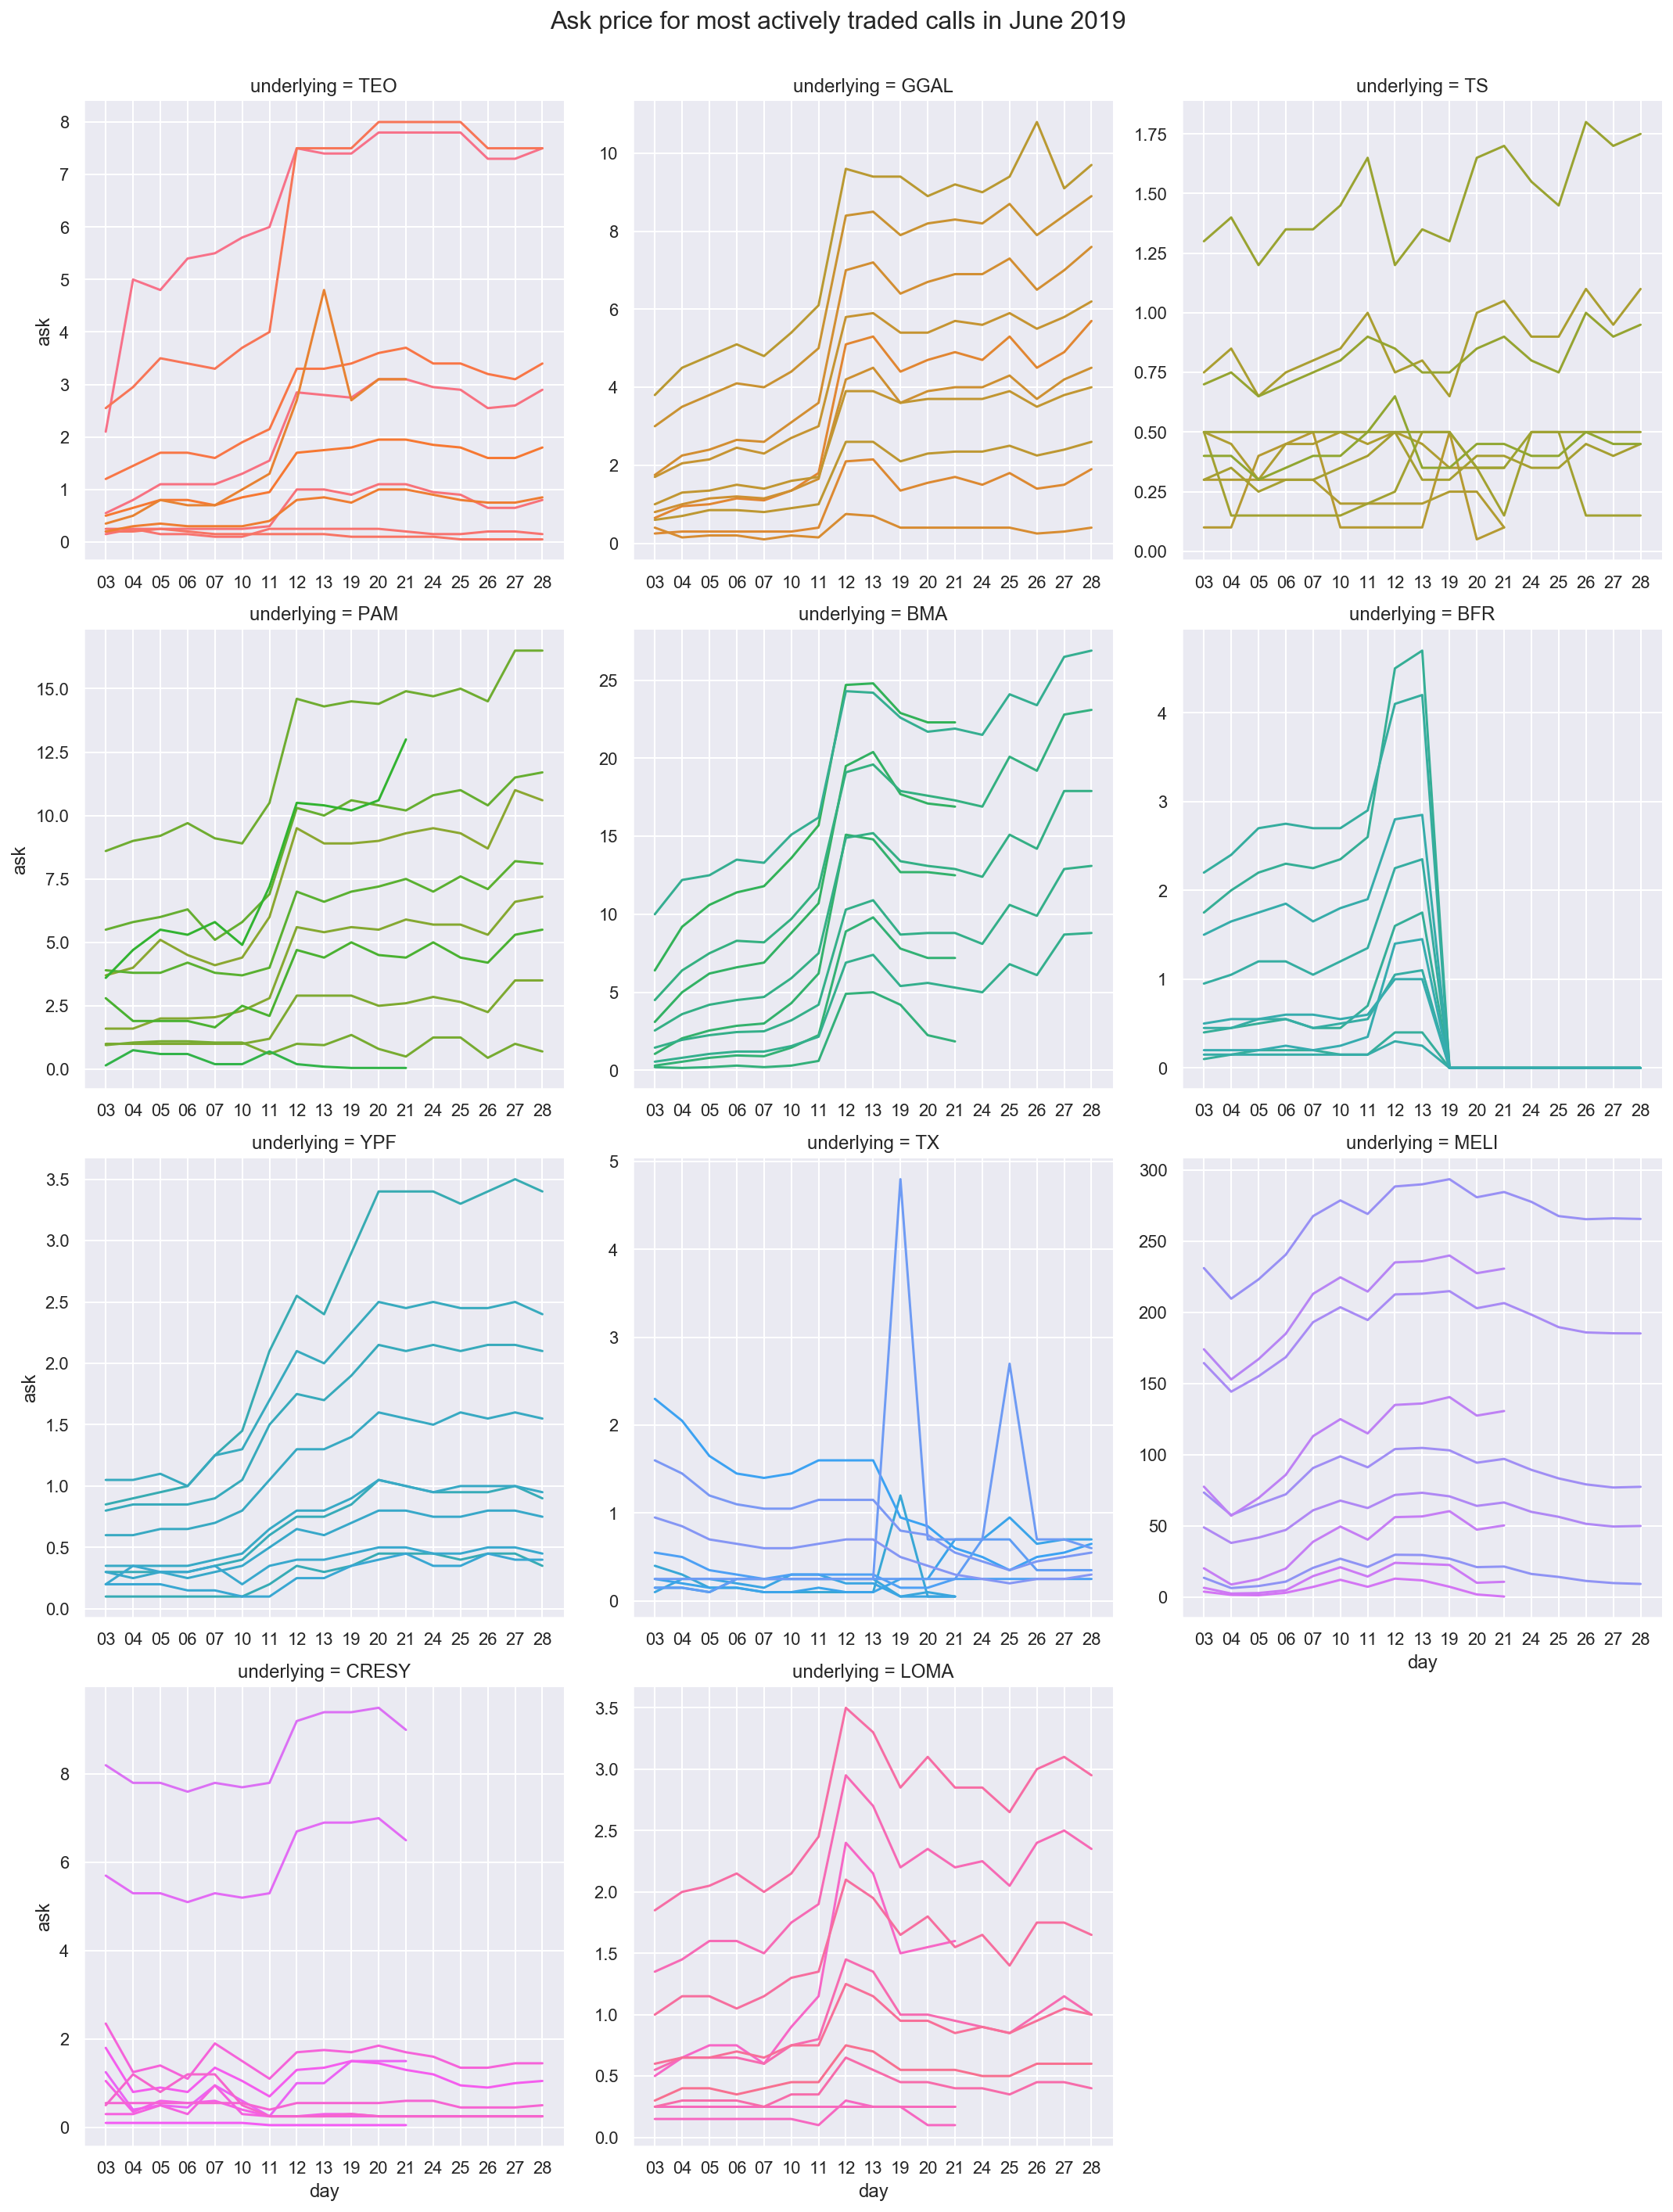

In [37]:
g = sns.relplot(x='day', y='ask', col='underlying', hue='optionroot',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=None,
            kind='line', data=june_active_calls, ci=None)

g.fig.suptitle('Ask price for most actively traded calls in June 2019', size=16)
g.fig.subplots_adjust(top=0.94);

Next we'll have a look the the actively traded puts for June 2019.

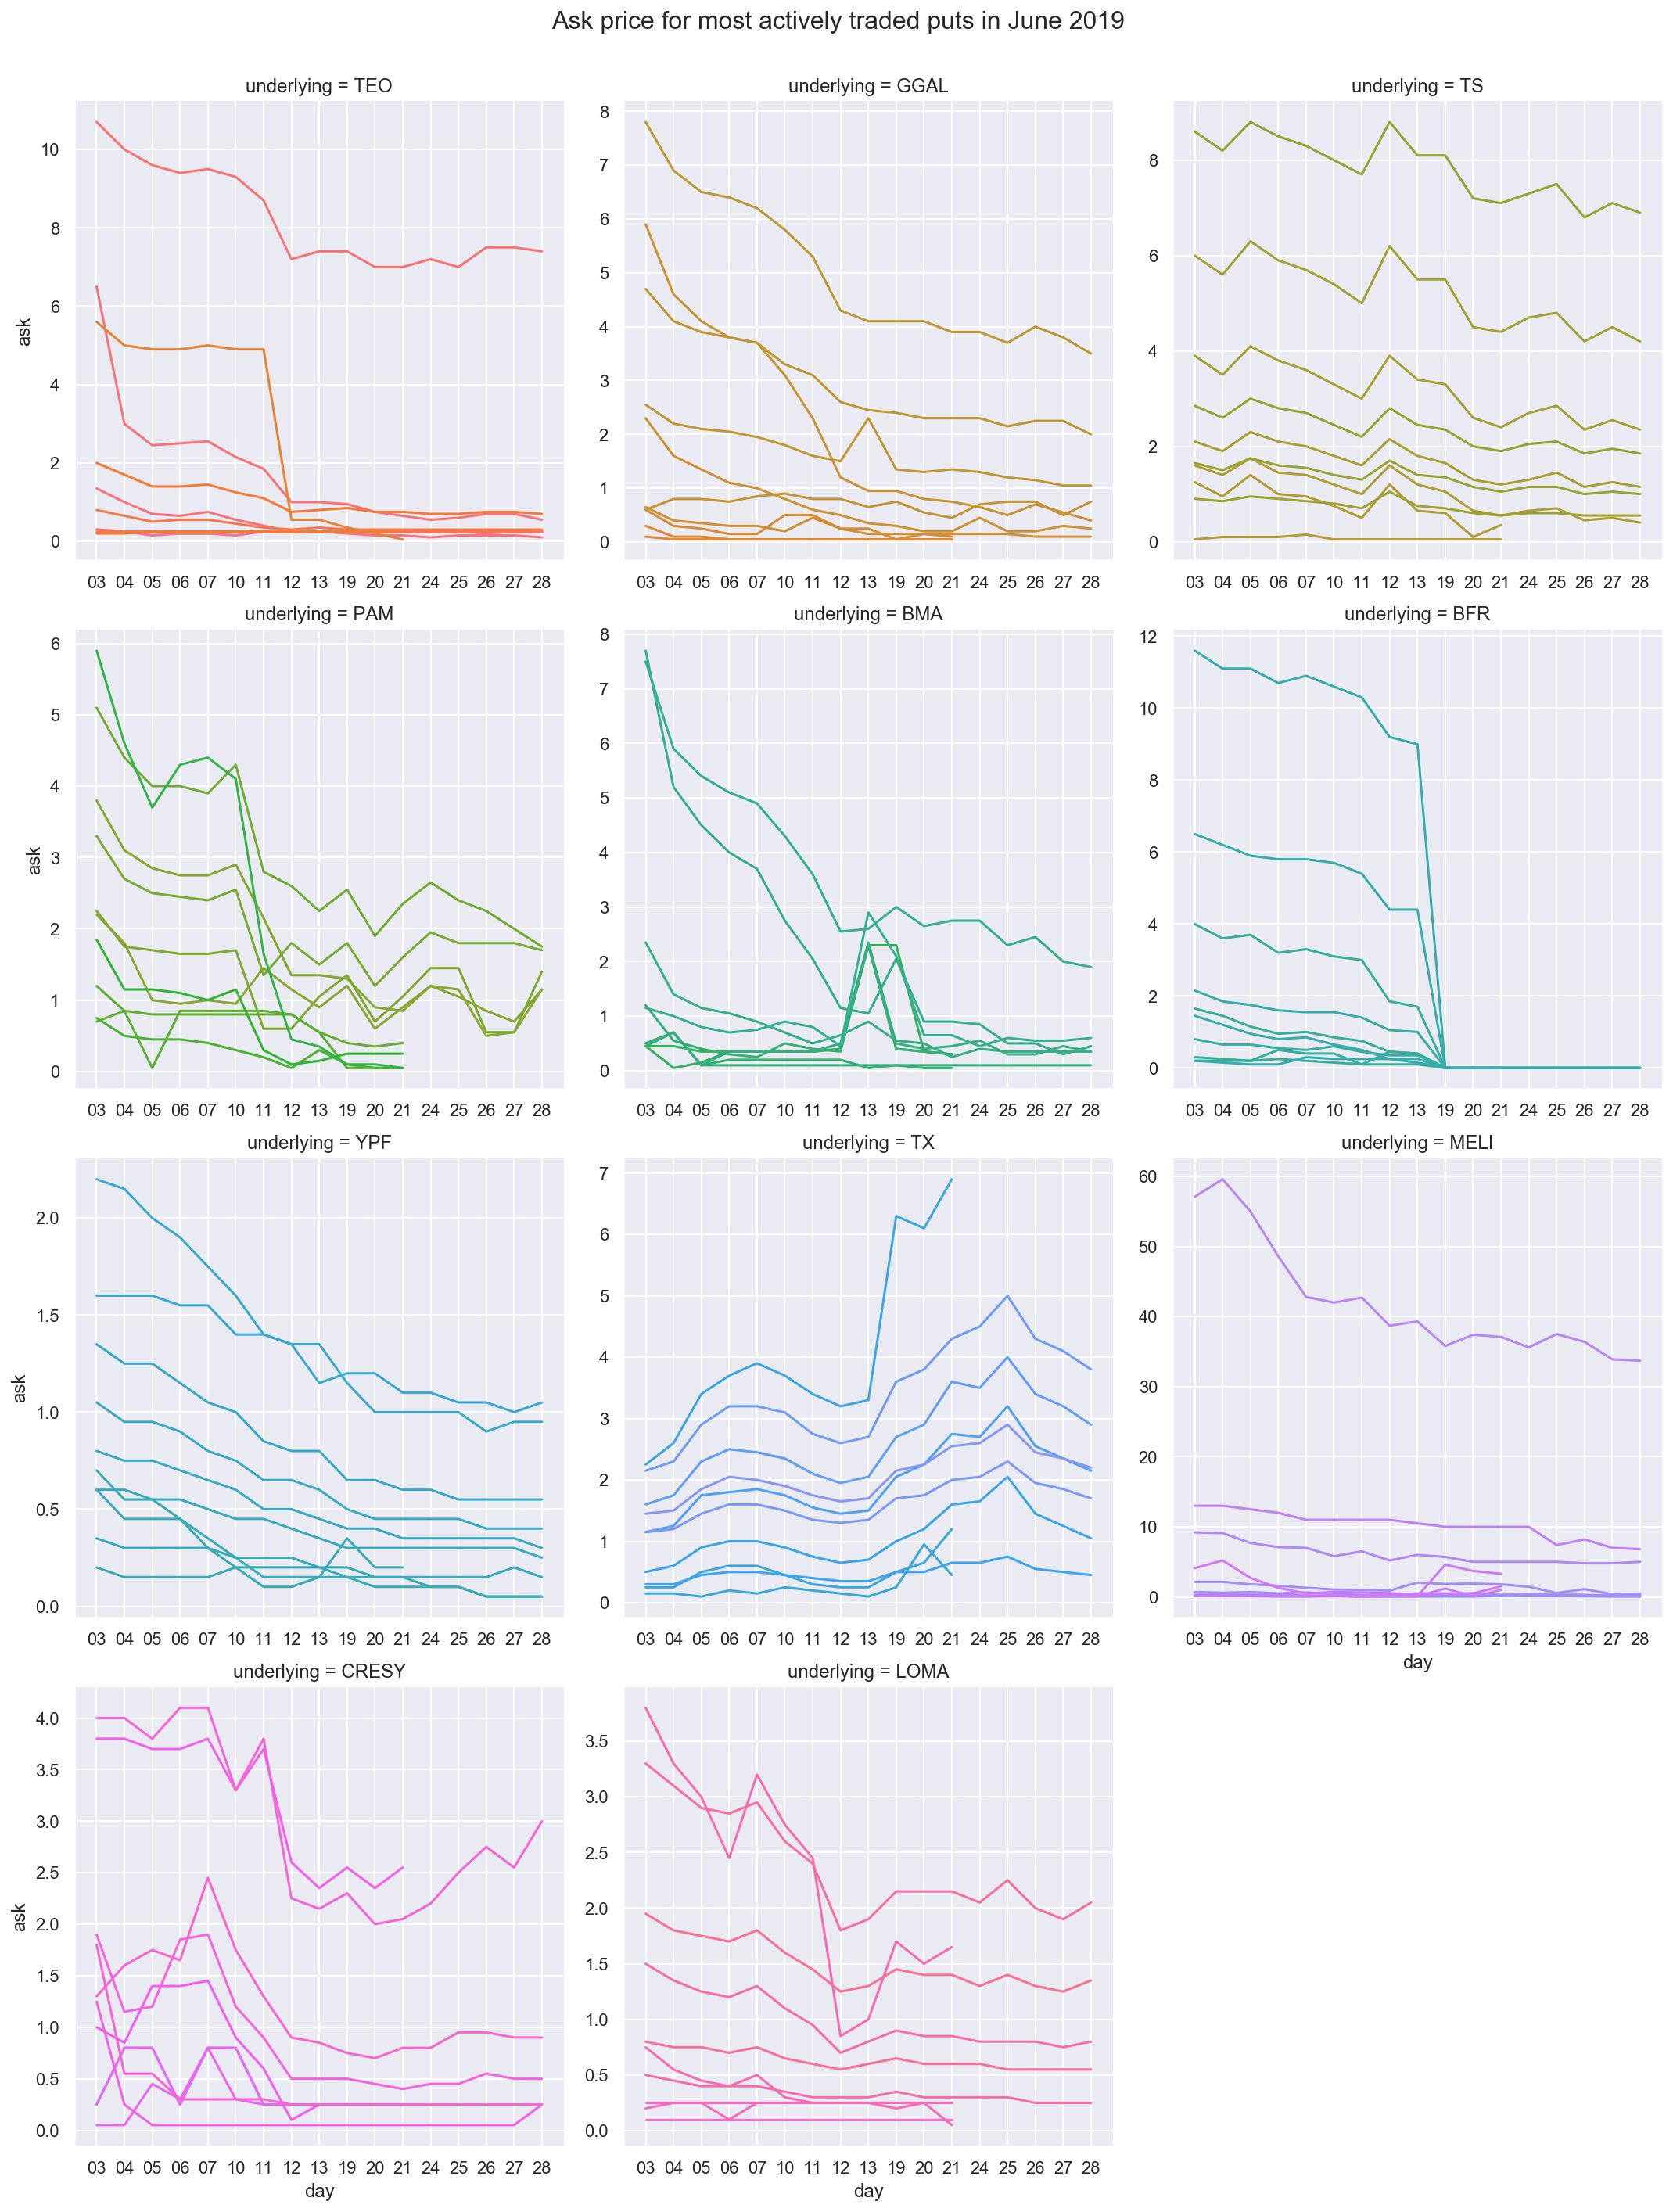

In [38]:
g = sns.relplot(x='day', y='ask', col='underlying', hue='optionroot',
            facet_kws=dict(sharey=False, sharex=False), col_wrap=3, legend=None,
            kind='line', data=june_active_puts, ci=None)

g.fig.suptitle('Ask price for most actively traded puts in June 2019', size=16)
g.fig.subplots_adjust(top=0.94);

## Final notes

Countries such as Argentina exhibit high [political beta](https://www.fa-mag.com/news/political-beta-44530.html): stocks show extreme sensitivity to political events. The MERVAL index nearly quadrupled its value in Pesos since December 2015, only to drop by %40 in a single day in August 2019.  
Investors tend to exacerbate bull runs, discounting future growth in the current stock prices. At the prospect of regulatory changes and political turnover, they panic sell and seek less risky assets. There remains to be seen whether savvy traders can exploit both the overconfident bulls and the panicking bears, buying volatility from the former to sell it at a profit to the latter.